In [31]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests
import html5lib
import datetime
import os

#I. Team Performance Analysis

In [37]:
a=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-11-29" + ".csv", index_col=0)
b=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-11-30" + ".csv", index_col=0)
c=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-02" + ".csv", index_col=0)
d=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-03" + ".csv", index_col=0)
e=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-04" + ".csv", index_col=0)
f=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-05" + ".csv", index_col=0)
g=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-06" + ".csv", index_col=0)
h=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-07" + ".csv", index_col=0)
i=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NBA" + "2015-12-08" + ".csv", index_col=0)

a['Date']=datetime.datetime.strptime("2015-11-29", "%Y-%m-%d")
b['Date']=datetime.datetime.strptime("2015-11-30", "%Y-%m-%d")
c['Date']=datetime.datetime.strptime("2015-12-02", "%Y-%m-%d")
d['Date']=datetime.datetime.strptime("2015-12-03", "%Y-%m-%d")
e['Date']=datetime.datetime.strptime("2015-12-04", "%Y-%m-%d")
f['Date']=datetime.datetime.strptime("2015-12-05", "%Y-%m-%d")
g['Date']=datetime.datetime.strptime("2015-12-06", "%Y-%m-%d")
h['Date']=datetime.datetime.strptime("2015-12-07", "%Y-%m-%d")
i['Date']=datetime.datetime.strptime("2015-12-08", "%Y-%m-%d")

frames = [a,b,c,d,e,f,g,h,i]
result = pd.concat(frames).reset_index(drop=True)
result['STRK']=result['STRK'].str.replace('W', '+')
result['STRK']=result['STRK'].str.replace('L', '-')
result['STRK']=result['STRK'].str.replace('OT ', '-')
result['STRK']=result['STRK'].astype(int)
#result['Teams']=result['Teams'].str.replace("Montréal","Montreal")

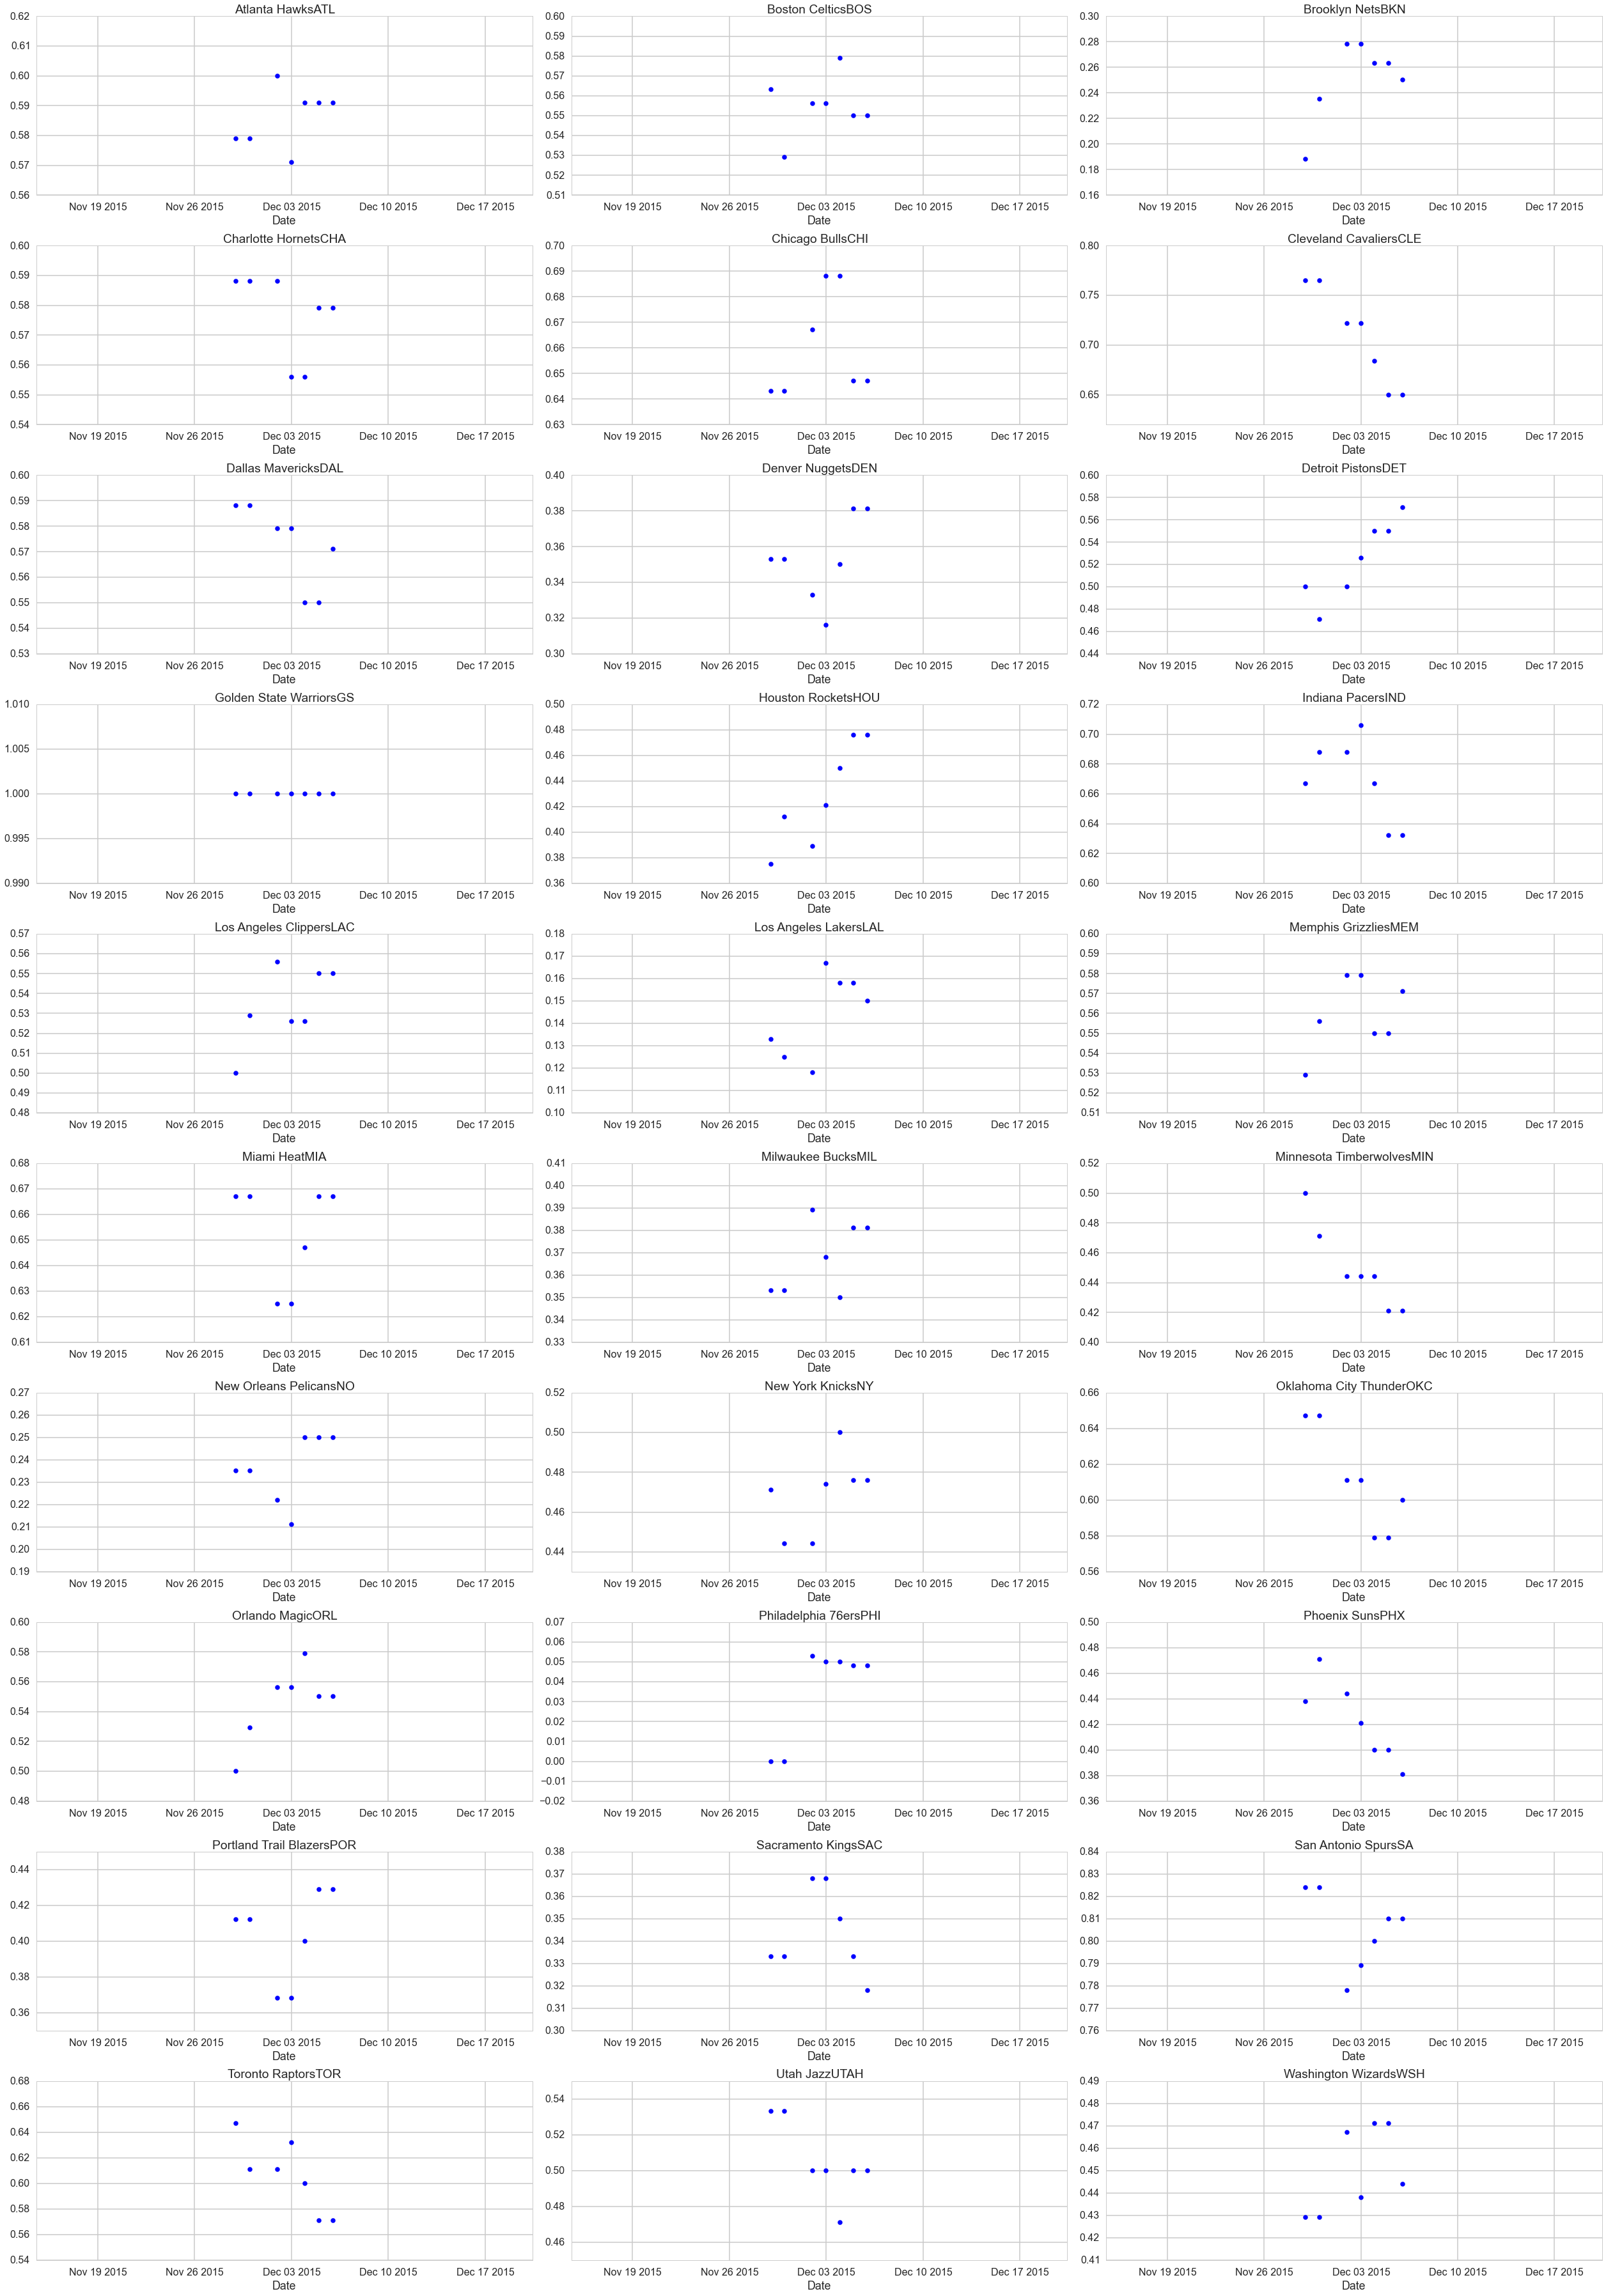

In [38]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), result.groupby('Teams')):
    #establish a figure
    plt.figure()
    ax.scatter(team[1]['Date'].values, team[1]['PCT'].values, alpha=1, color='b', lw=3)
    ax.set_title(team[0])
    ax.set_xlabel('Date')

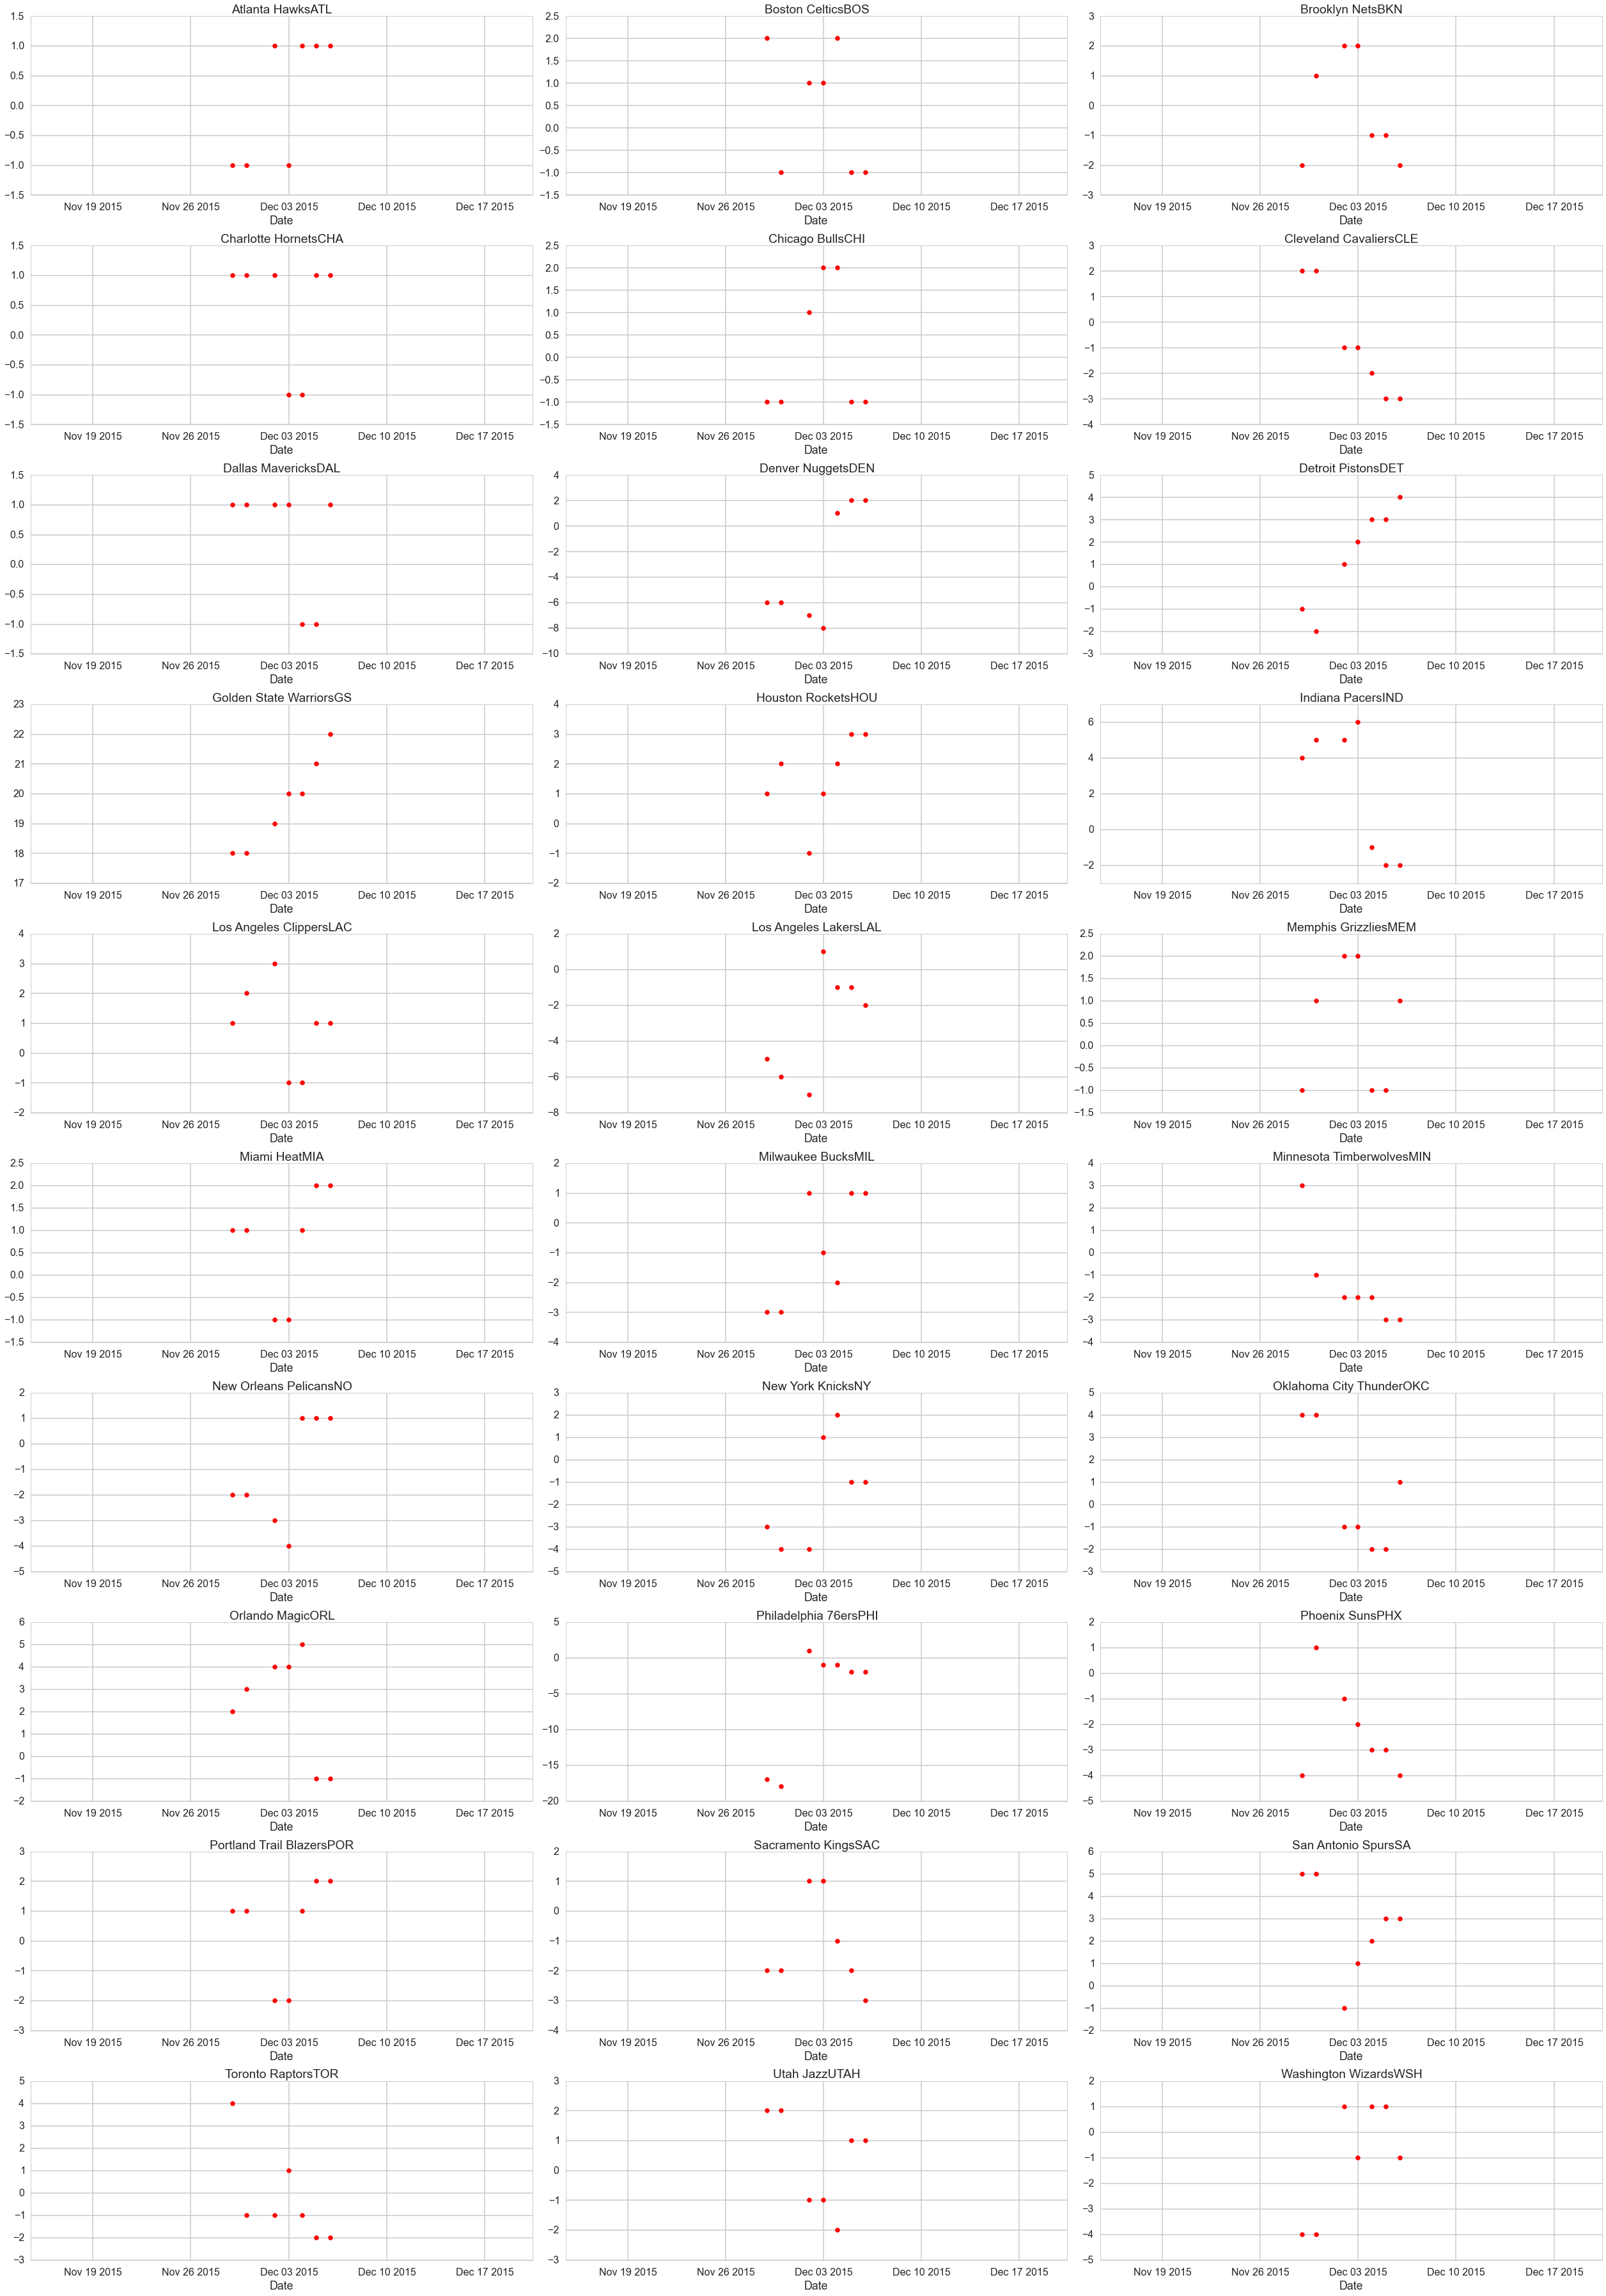

In [42]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), result.groupby('Teams')):
    plt.figure()
    ax.scatter(team[1]['Date'].values, team[1]['STRK'].values, alpha=1, color='r', lw=3)
    ax.set_title(team[0])
    ax.set_xlabel('Date')

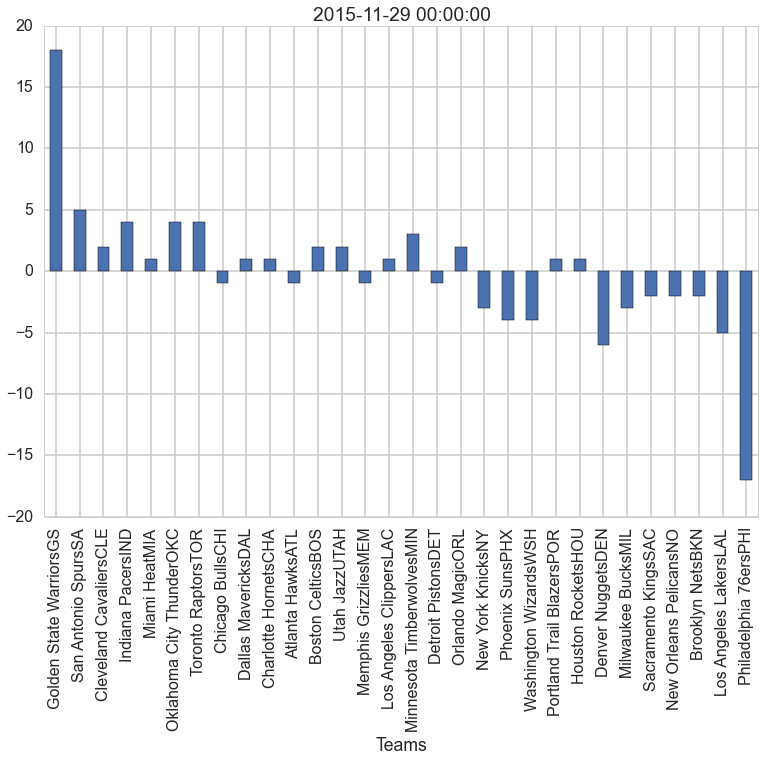

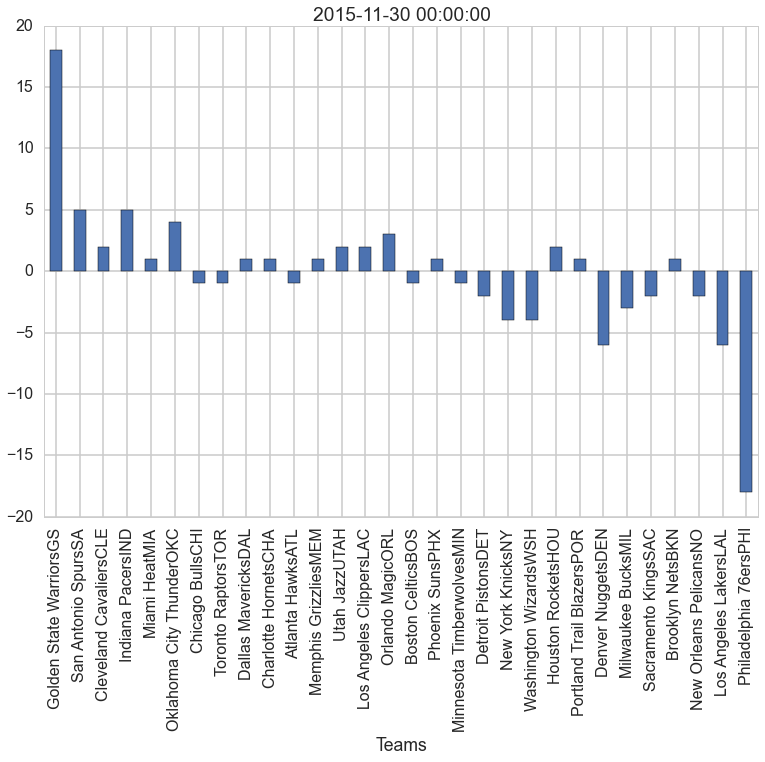

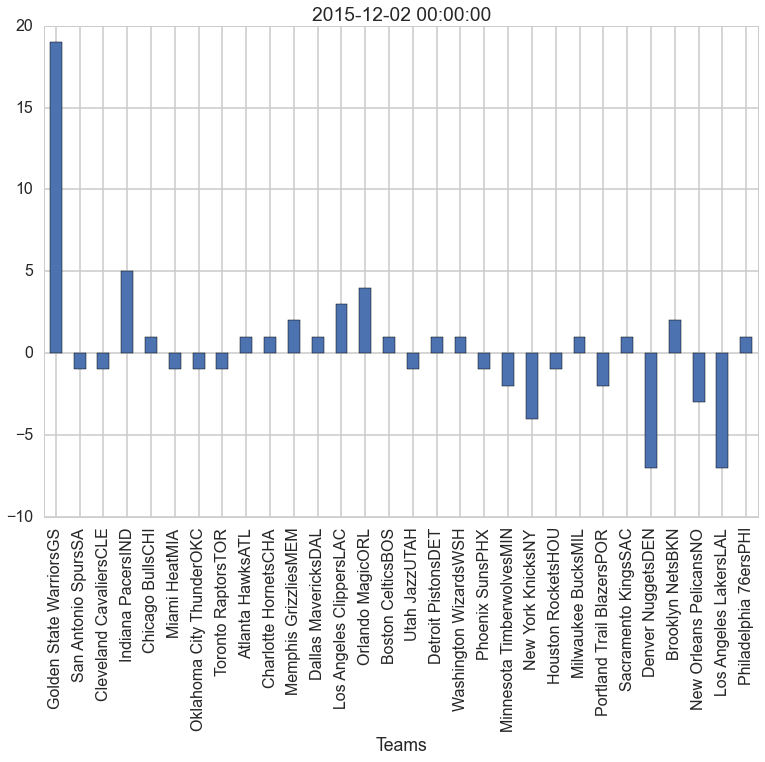

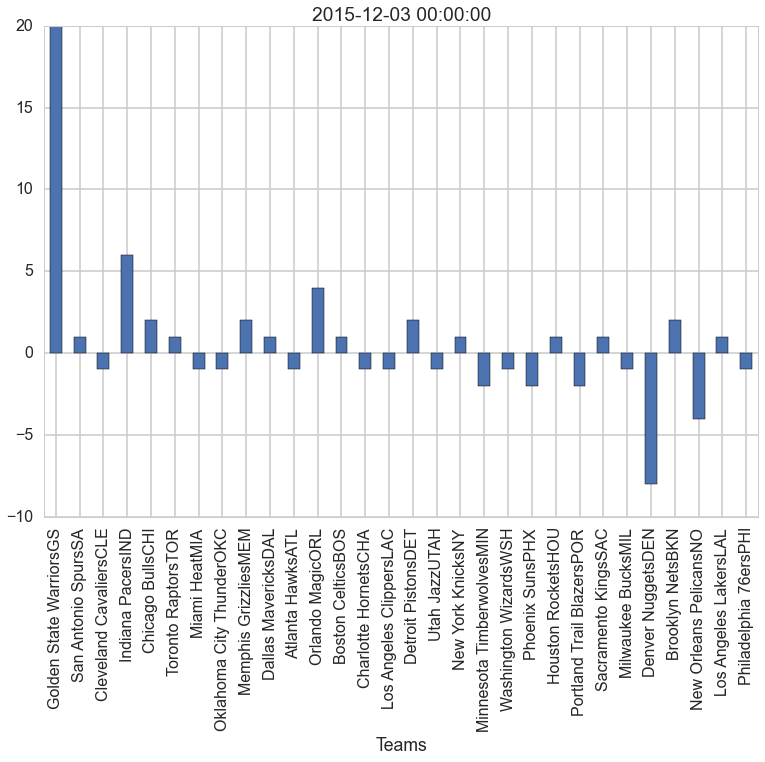

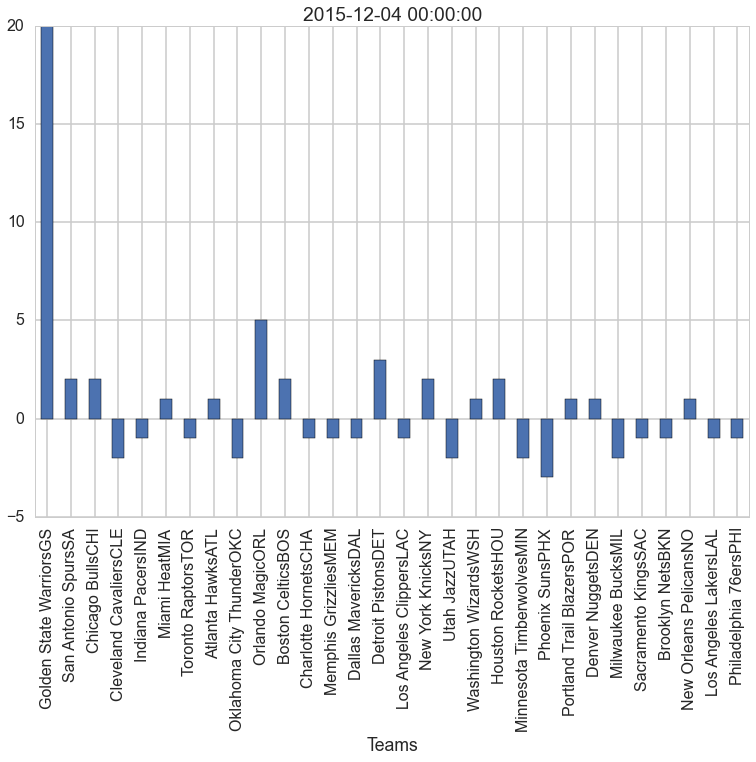

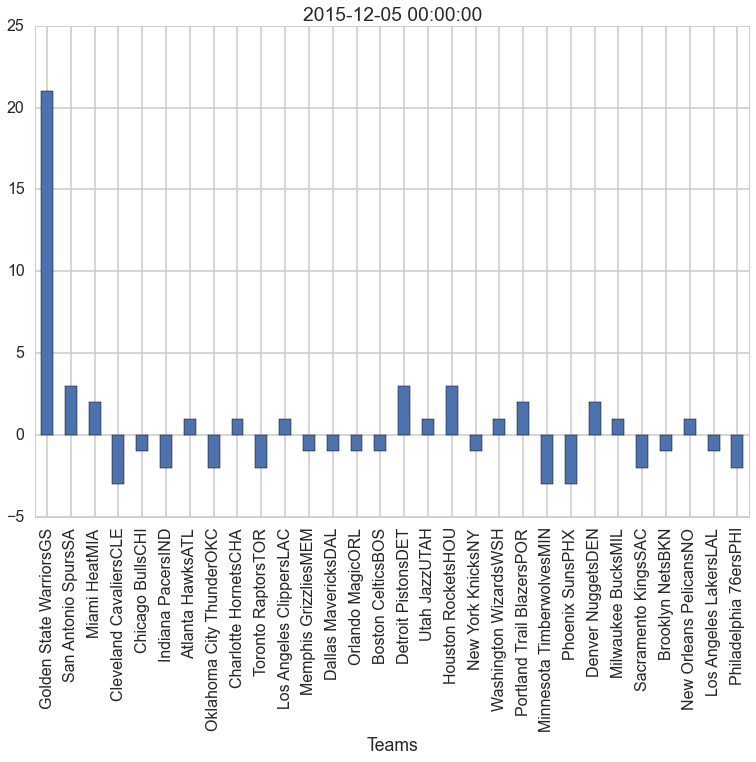

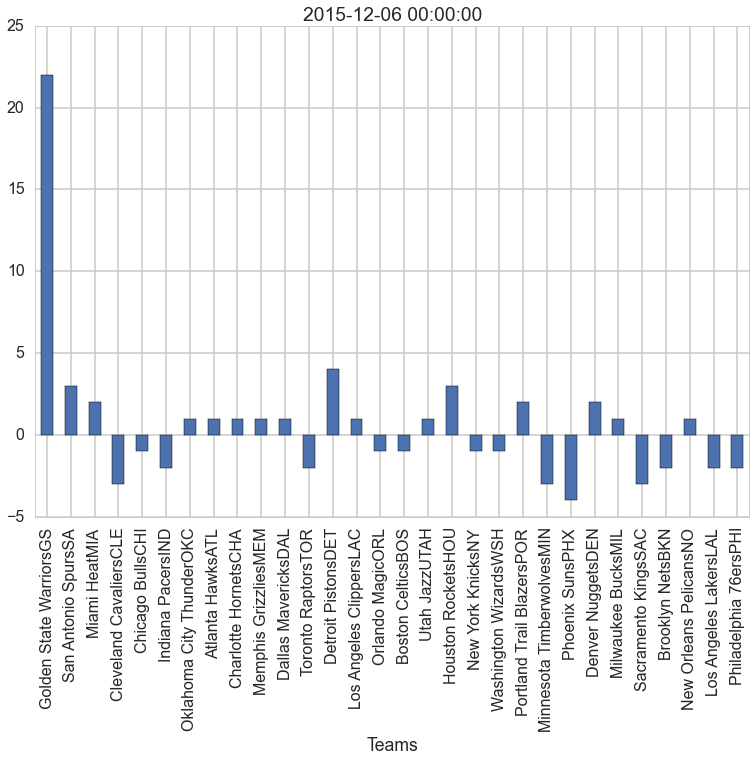

In [40]:
for day in result.groupby('Date'):
    plt.figure()
    lol=day[1].set_index('Teams')
    lol['STRK'].plot(kind='bar')
    plt.title(day[0])
    plt.xlabel('Teams')
    plt.show()

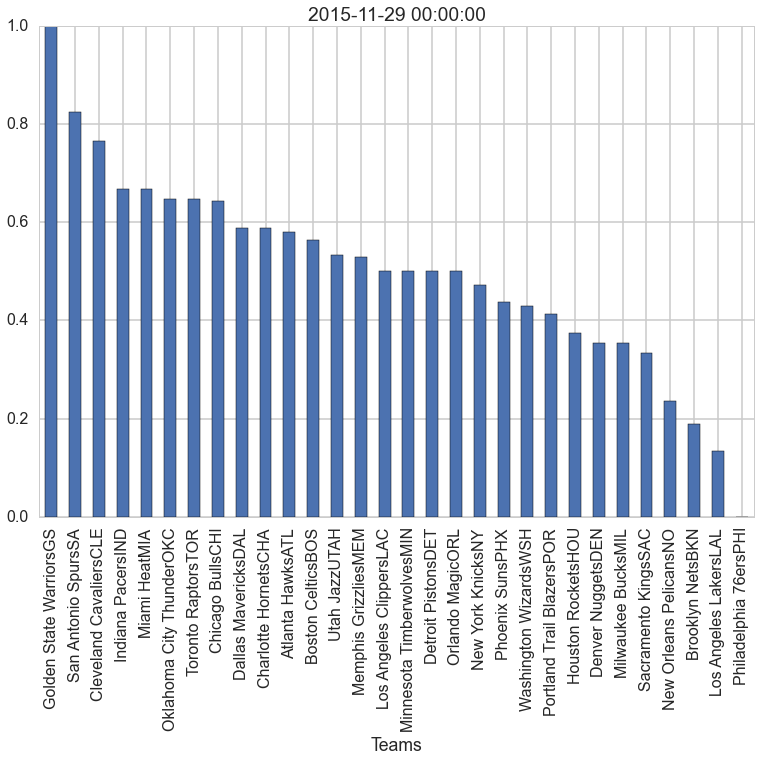

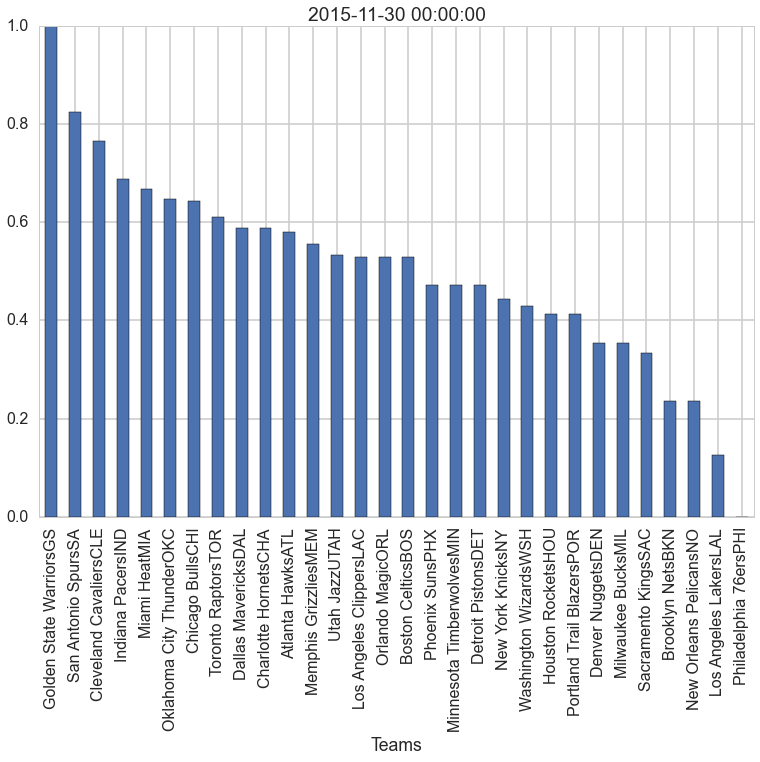

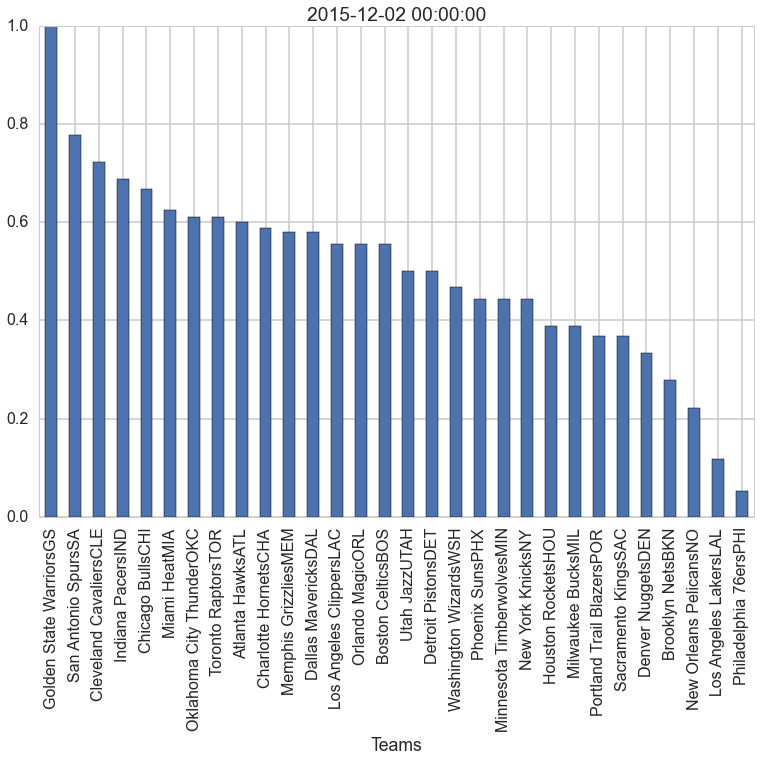

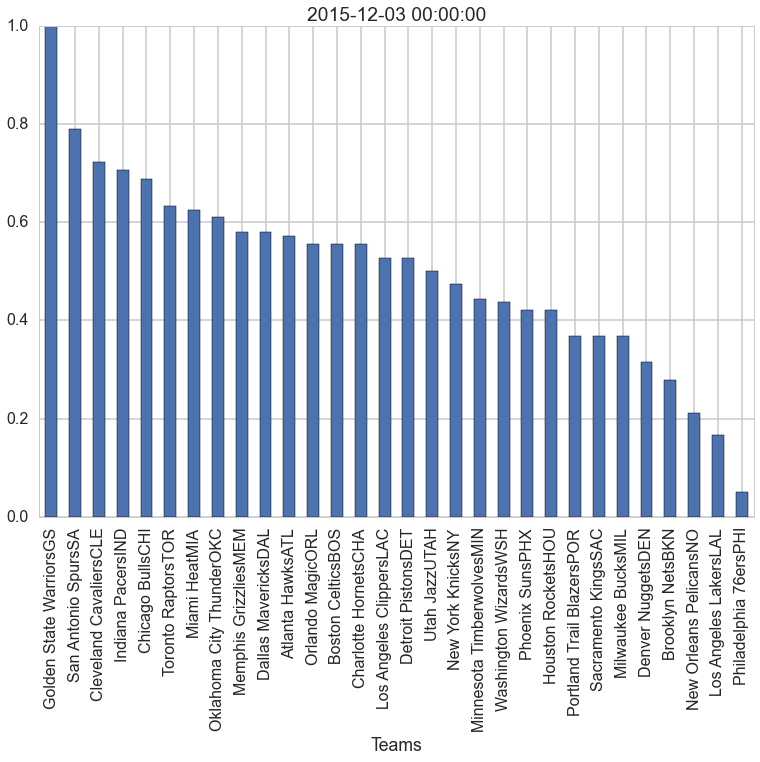

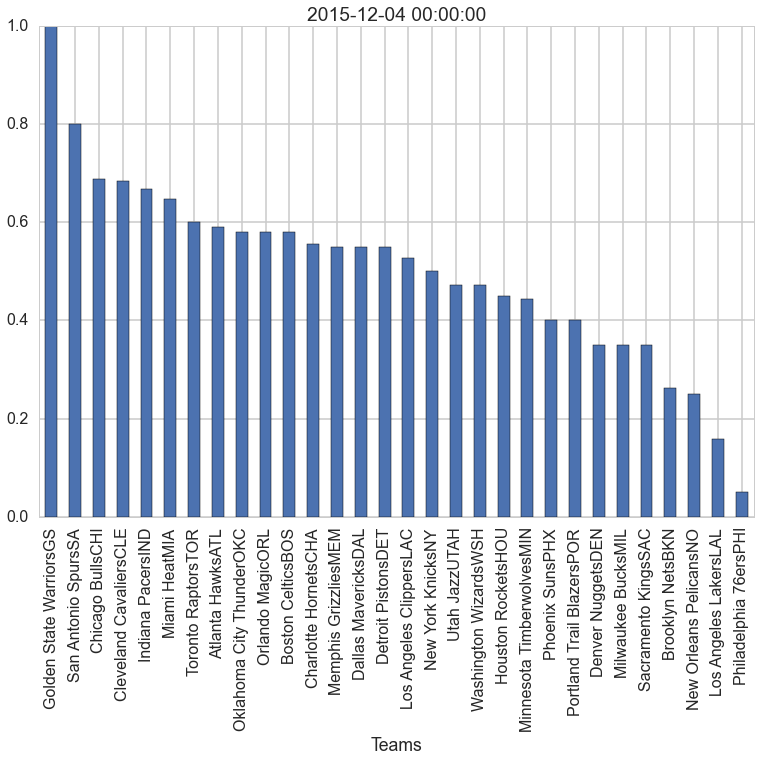

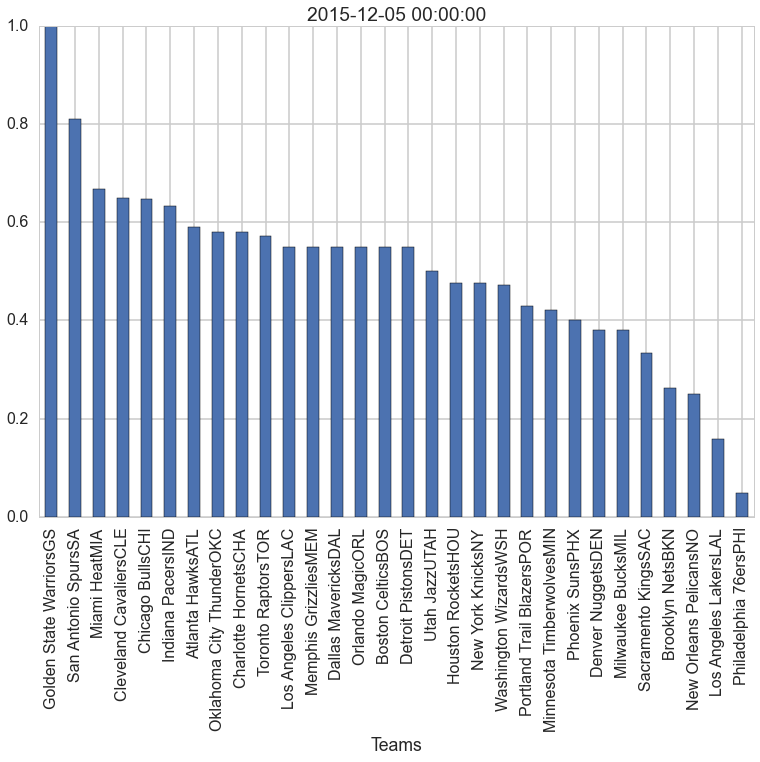

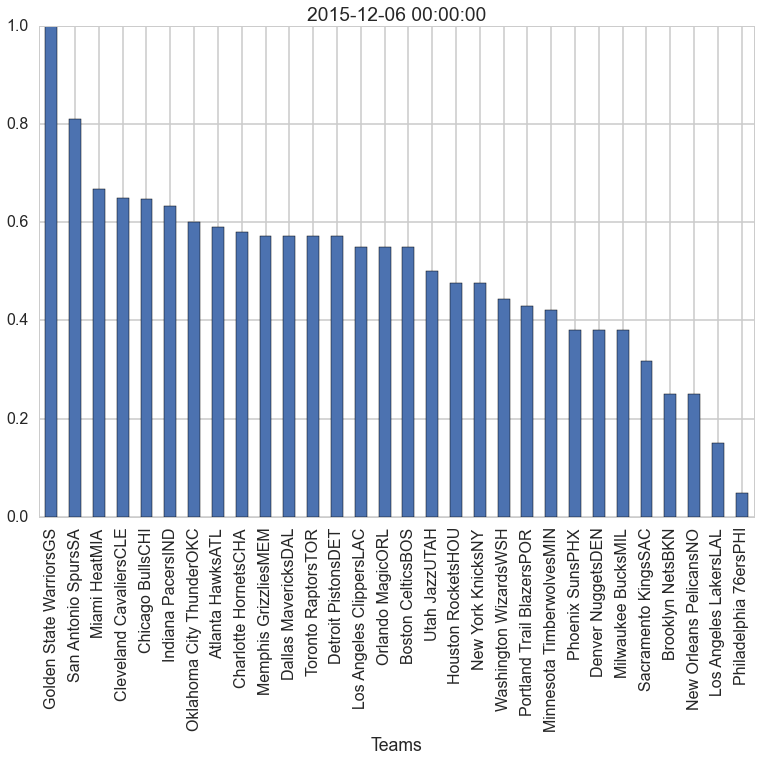

In [43]:
for day in result.groupby('Date'):
    plt.figure()
    lol=day[1].set_index('Teams')
    lol['PCT'].plot(kind='bar')
    plt.title(day[0])
    plt.xlabel('Teams')
    plt.show()

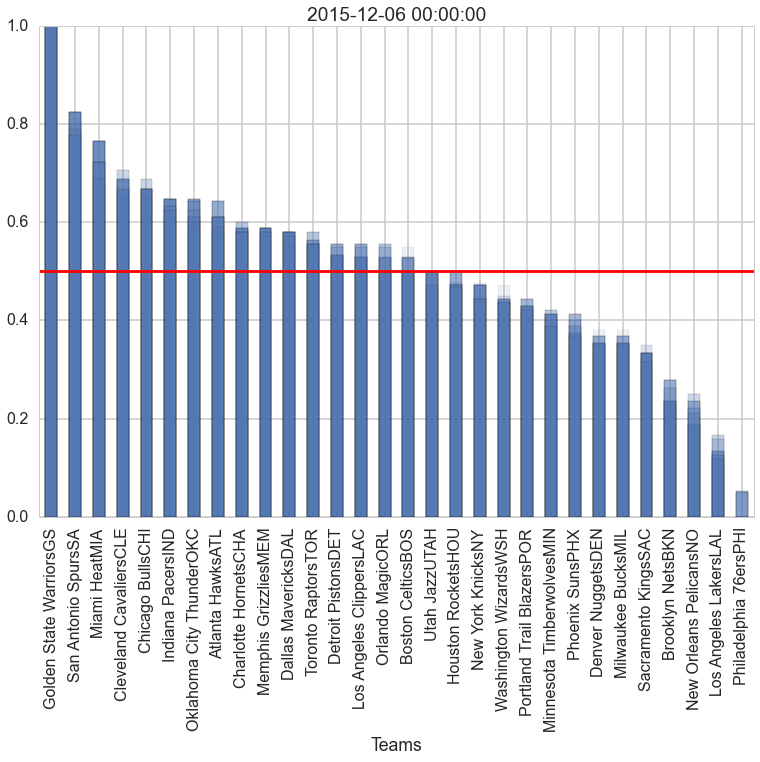

In [56]:
#scatter plot of ticket price vs. winning record here
plt.figure()
count=0.6

for day in result.groupby('Date'):
    lol=day[1].set_index('Teams')
    lol['PCT'].plot(kind='bar', alpha=count)
    plt.title(day[0])
    plt.xlabel('Teams')
    count-=0.1
plt.axhline(y=0.5, color='r')
plt.show()

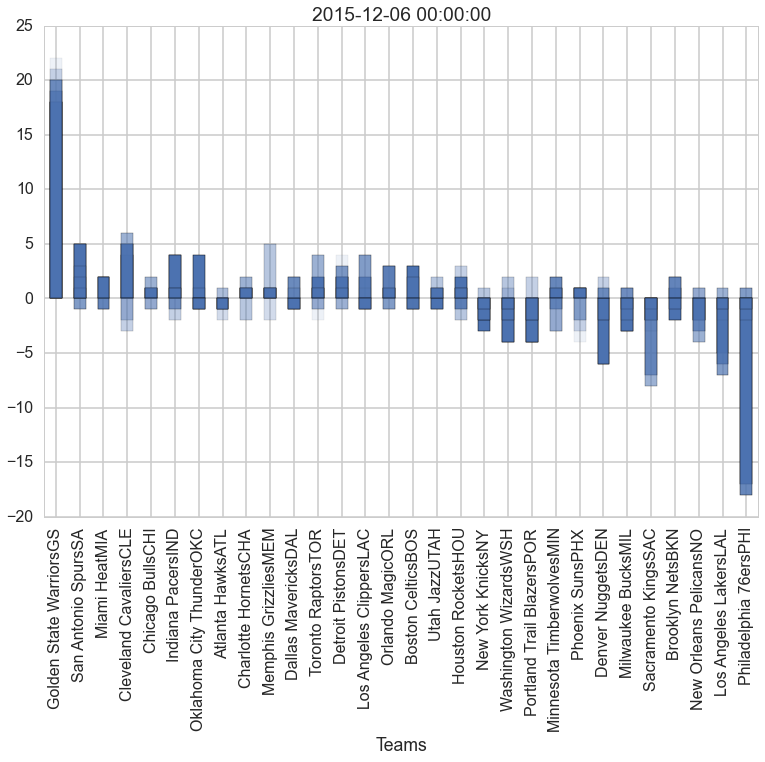

In [57]:
plt.figure()
count=1
for day in result.groupby('Date'):
    lol=day[1].set_index('Teams')
    lol['STRK'].plot(kind='bar', alpha=count)
    plt.title(day[0])
    plt.xlabel('Teams')
    count-=0.15
plt.show()

## Part 2. Salary

In [10]:
NBAsalaryplayers=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Salary/NBA" + "2015-11-29" + ".csv", index_col=0)

In [11]:
NBAsalary1=NBAsalaryplayers.groupby('TEAM').sum()
NBAsalary1.drop('RK', axis=1, inplace=True)
NBAsalary2=NBAsalaryplayers.groupby('TEAM').count()
NBAsalary2.drop(NBAsalary2.columns[[0,2]], axis=1, inplace=True)
NBAsalary=pd.concat([NBAsalary1, NBAsalary2], axis=1)
NBAsalary.columns = ['TotalSalary', 'Count']
NBAsalary.sort(columns='TotalSalary', ascending=False)

TotalSalary  Count
TEAM                                      
Brooklyn Nets              58654317      3
Oklahoma City Thunder      47064686      3
Dallas Mavericks           42455978      3
Golden State Warriors      40274517      3
Los Angeles Clippers       37743176      2
Cleveland Cavaliers        36363463      2
Houston Rockets            36165115      2
Miami Heat                 35644400      2
Sacramento Kings           34063326      2
Memphis Grizzlies          32329688      2
Chicago Bulls              31562876      2
Indiana Pacers             30836228      2
Washington Wizards         27746000      2
Los Angeles Lakers         23500000      1
New York Knicks            22458401      1
Portland Trail Blazers     16006000      1
New Orleans Pelicans       14898938      1
Charlotte Hornets          13500000      1
Phoenix Suns               13000000      1
Utah Jazz                  12950000      1
San Antonio Spurs          12500000      1
Minnesota Timberwolves     12100000      1
Toronto Raptors            12000000      1

In [12]:
len(NBAsalary)

#log totalsalary
#add 7 teams
#addd 0 count

23

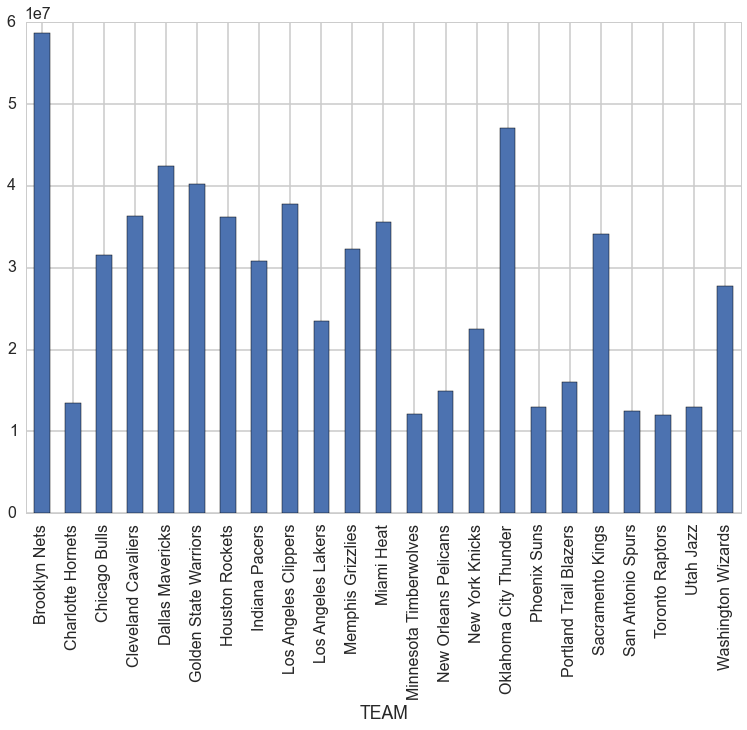

In [13]:
NBAsalary['TotalSalary'].plot(kind='bar')

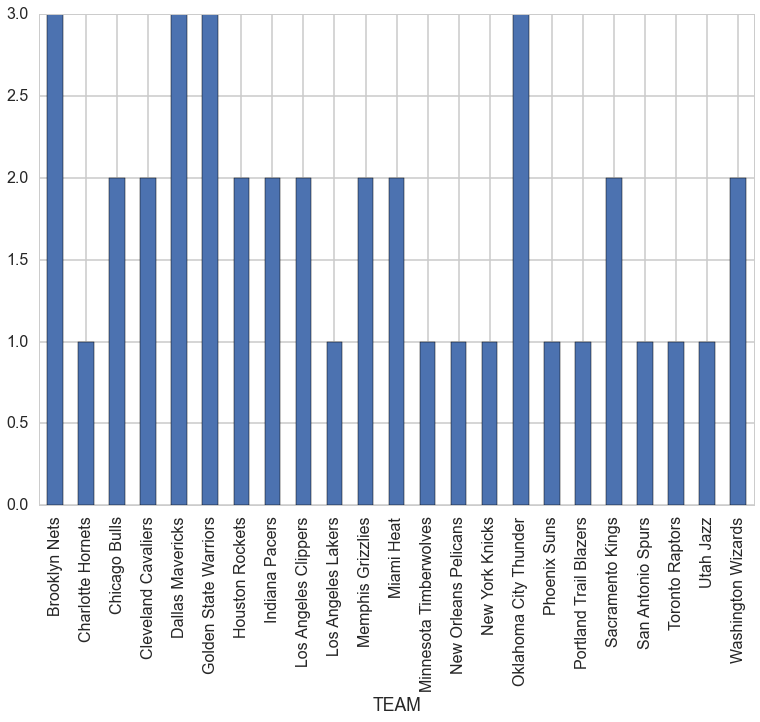

In [14]:
NBAsalary['Count'].plot(kind='bar')

#Attendance

In [15]:
attendance=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Attendance/NBA" + "2015-11-29" + ".csv", index_col=0)

In [16]:
attendance.columns = ['RK','TEAM','HomeGames', 'HomeTotal','HomeAVG','HomePCT','AwayGames','AwayAVG','AwayPCT','TotalGames', 'TotalAVG','TotalPCT']

In [17]:
attendance.sort('TotalPCT', ascending=False).head(2)

RK     TEAM  HomeGames  HomeTotal  HomeAVG  HomePCT  AwayGames  AwayAVG  AwayPCT  TotalGames  TotalAVG  TotalPCT
12  13  Thunder         11     200233    18203    100.0          6    19244     99.4          17     18570      99.8
10  11   Lakers          6     113982    18997     99.7          9    19059     99.9          15     19034      99.8

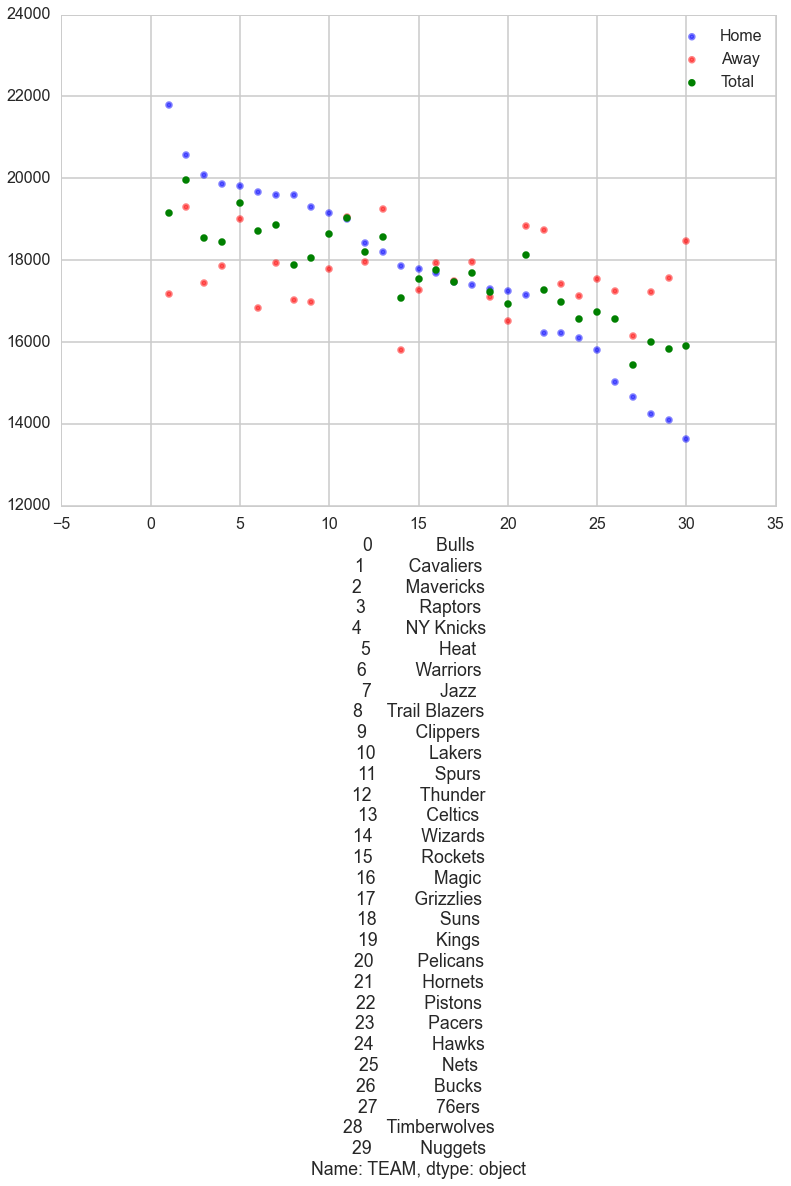

In [18]:
plt.figure()
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['HomeAVG'], alpha=0.5, color='b', lw=3, label='Home')
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['AwayAVG'], alpha=0.5, color='r', lw=3, label='Away')
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['TotalAVG'], alpha=1, color='g', lw=3, label='Total')
plt.legend(loc='best')
plt.xlabel(attendance['TEAM'])
plt.show()

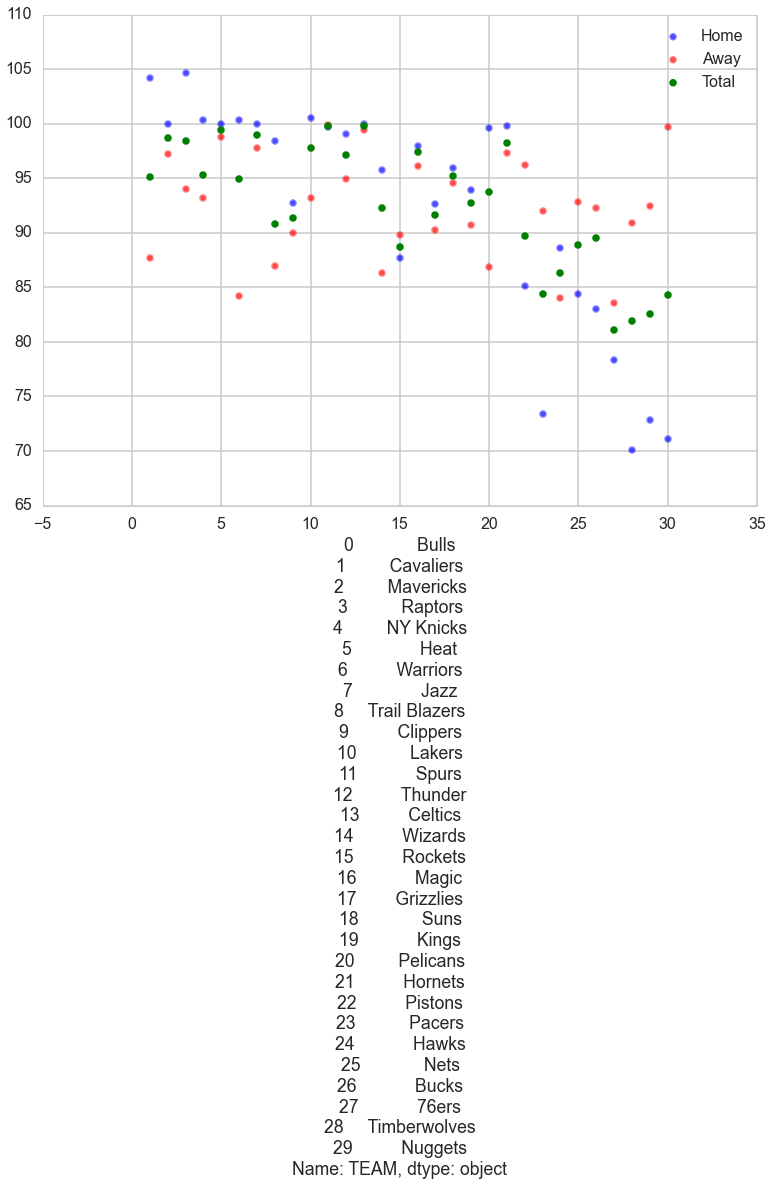

In [19]:
plt.figure()
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['HomePCT'], alpha=0.5, color='b', lw=3, label='Home')
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['AwayPCT'], alpha=0.5, color='r', lw=3, label='Away')
plt.scatter(attendance.set_index('TEAM')['RK'], attendance.set_index('TEAM')['TotalPCT'], alpha=1, color='g', lw=3, label='Total')
plt.legend(loc='best')
plt.xlabel(attendance['TEAM'])
plt.show()

#Ticket Prices

In [20]:
a=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-25" + ".csv", index_col=0)
b=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-26" + ".csv", index_col=0)
c=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-27" + ".csv", index_col=0)
d=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-28" + ".csv", index_col=0)
e=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-29" + ".csv", index_col=0)
f=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-11-30" + ".csv", index_col=0)
g=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-12-01" + ".csv", index_col=0)
h=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-12-03" + ".csv", index_col=0)
i=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-12-04" + ".csv", index_col=0)
j=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Tickets_Data/basketballdf" + "2015-12-05" + ".csv", index_col=0)
frames = [a,b,c,d,e,f,g,h,i,j]
tickets = pd.concat(frames).reset_index(drop=True)
tickets.drop(tickets.columns[[0,6,7,10,11,17,18,19,21,22,29]], axis=1, inplace=True)
tickets['dateutc'] = tickets['dateutc'].astype('datetime64')
#delete
# index 0
# datetime local 6
# created_at 7
# country 10
# extended address 11
# announce date 17
# short title 18
# datetime utc 19
# datetime tbd 21
# visible until utc 22
# time utc 29

In [21]:
tickets[tickets['home_team']=='Boston Celtics']

listing_count  avg_price  lowest_price_good_deal  lowest_price  highest_price          address    city  venueid  venuename postal_code  venuescore venuestate  ticket_score       id       home_team               away_team  hometeamscore  awayteamscore    dateutc  daysaway
0                 35      56.00                      27            27            257  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.76464  2759712  Boston Celtics      Philadelphia 76ers        0.74926        0.70023 2015-11-26         1
1                789      93.00                      37            37            623  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.78449  2759719  Boston Celtics      Washington Wizards        0.74926        0.71477 2015-11-28         3
6               2578      82.00                      31            31            602  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.80650  2759699  Boston Celtics           Chicago Bulls        0.74926        0.76158 2015-12-10        15
7               1528     213.00                      84            84           4622  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.81680  2760121  Boston Celtics   Golden State Warriors        0.74926        0.75917 2015-12-12        17
9               2586     167.00                      66            66           1336  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.82914  2759715  Boston Celtics     Cleveland Cavaliers        0.74926        0.64410 2015-12-16        21
11              2239      89.00                      24            24           1129  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.79069  2759703  Boston Celtics           Atlanta Hawks        0.74926        0.68793 2015-12-19        24
12              2383      76.00                      23            23          11153  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.79053  2759726  Boston Celtics  Minnesota Timberwolves        0.74926        0.64867 2015-12-22        27
15              2191     119.00                      51            51           6026  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.81718  2759828  Boston Celtics         New York Knicks        0.74926        0.81208 2015-12-28        33
16              2378     169.00                      76            76           1310  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.82898  2759730  Boston Celtics      Los Angeles Lakers        0.74926        0.76225 2015-12-31        36
17              2454     121.00                      46            46           3818  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.80338  2759705  Boston Celtics           Brooklyn Nets        0.74926        0.75544 2016-01-02        38
19              2576      69.00                      17            17           1151  100 Legends Way  Boston     1544  TD Garden       02114     0.85462         MA       0.78795  2759717  Boston Celtics         Detroit Pistons        0.74910        0.63662 2016-01-07        43
23              2613      69.00                      18            18           1126  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.79163  2759713  Boston Celtics          Indiana Pacers        0.74926        0.67729 2016-01-14        50
24              2267      88.00                      27            27           3015  100 Legends Way  Boston     1544  TD Garden       02114     0.85468         MA       0.79593  2759707  Boston Celtics            Phoenix Suns        0.74926        0.65574 2016-01-16        52
28              2517     135.00                      39            39           5775  100 Legends Way

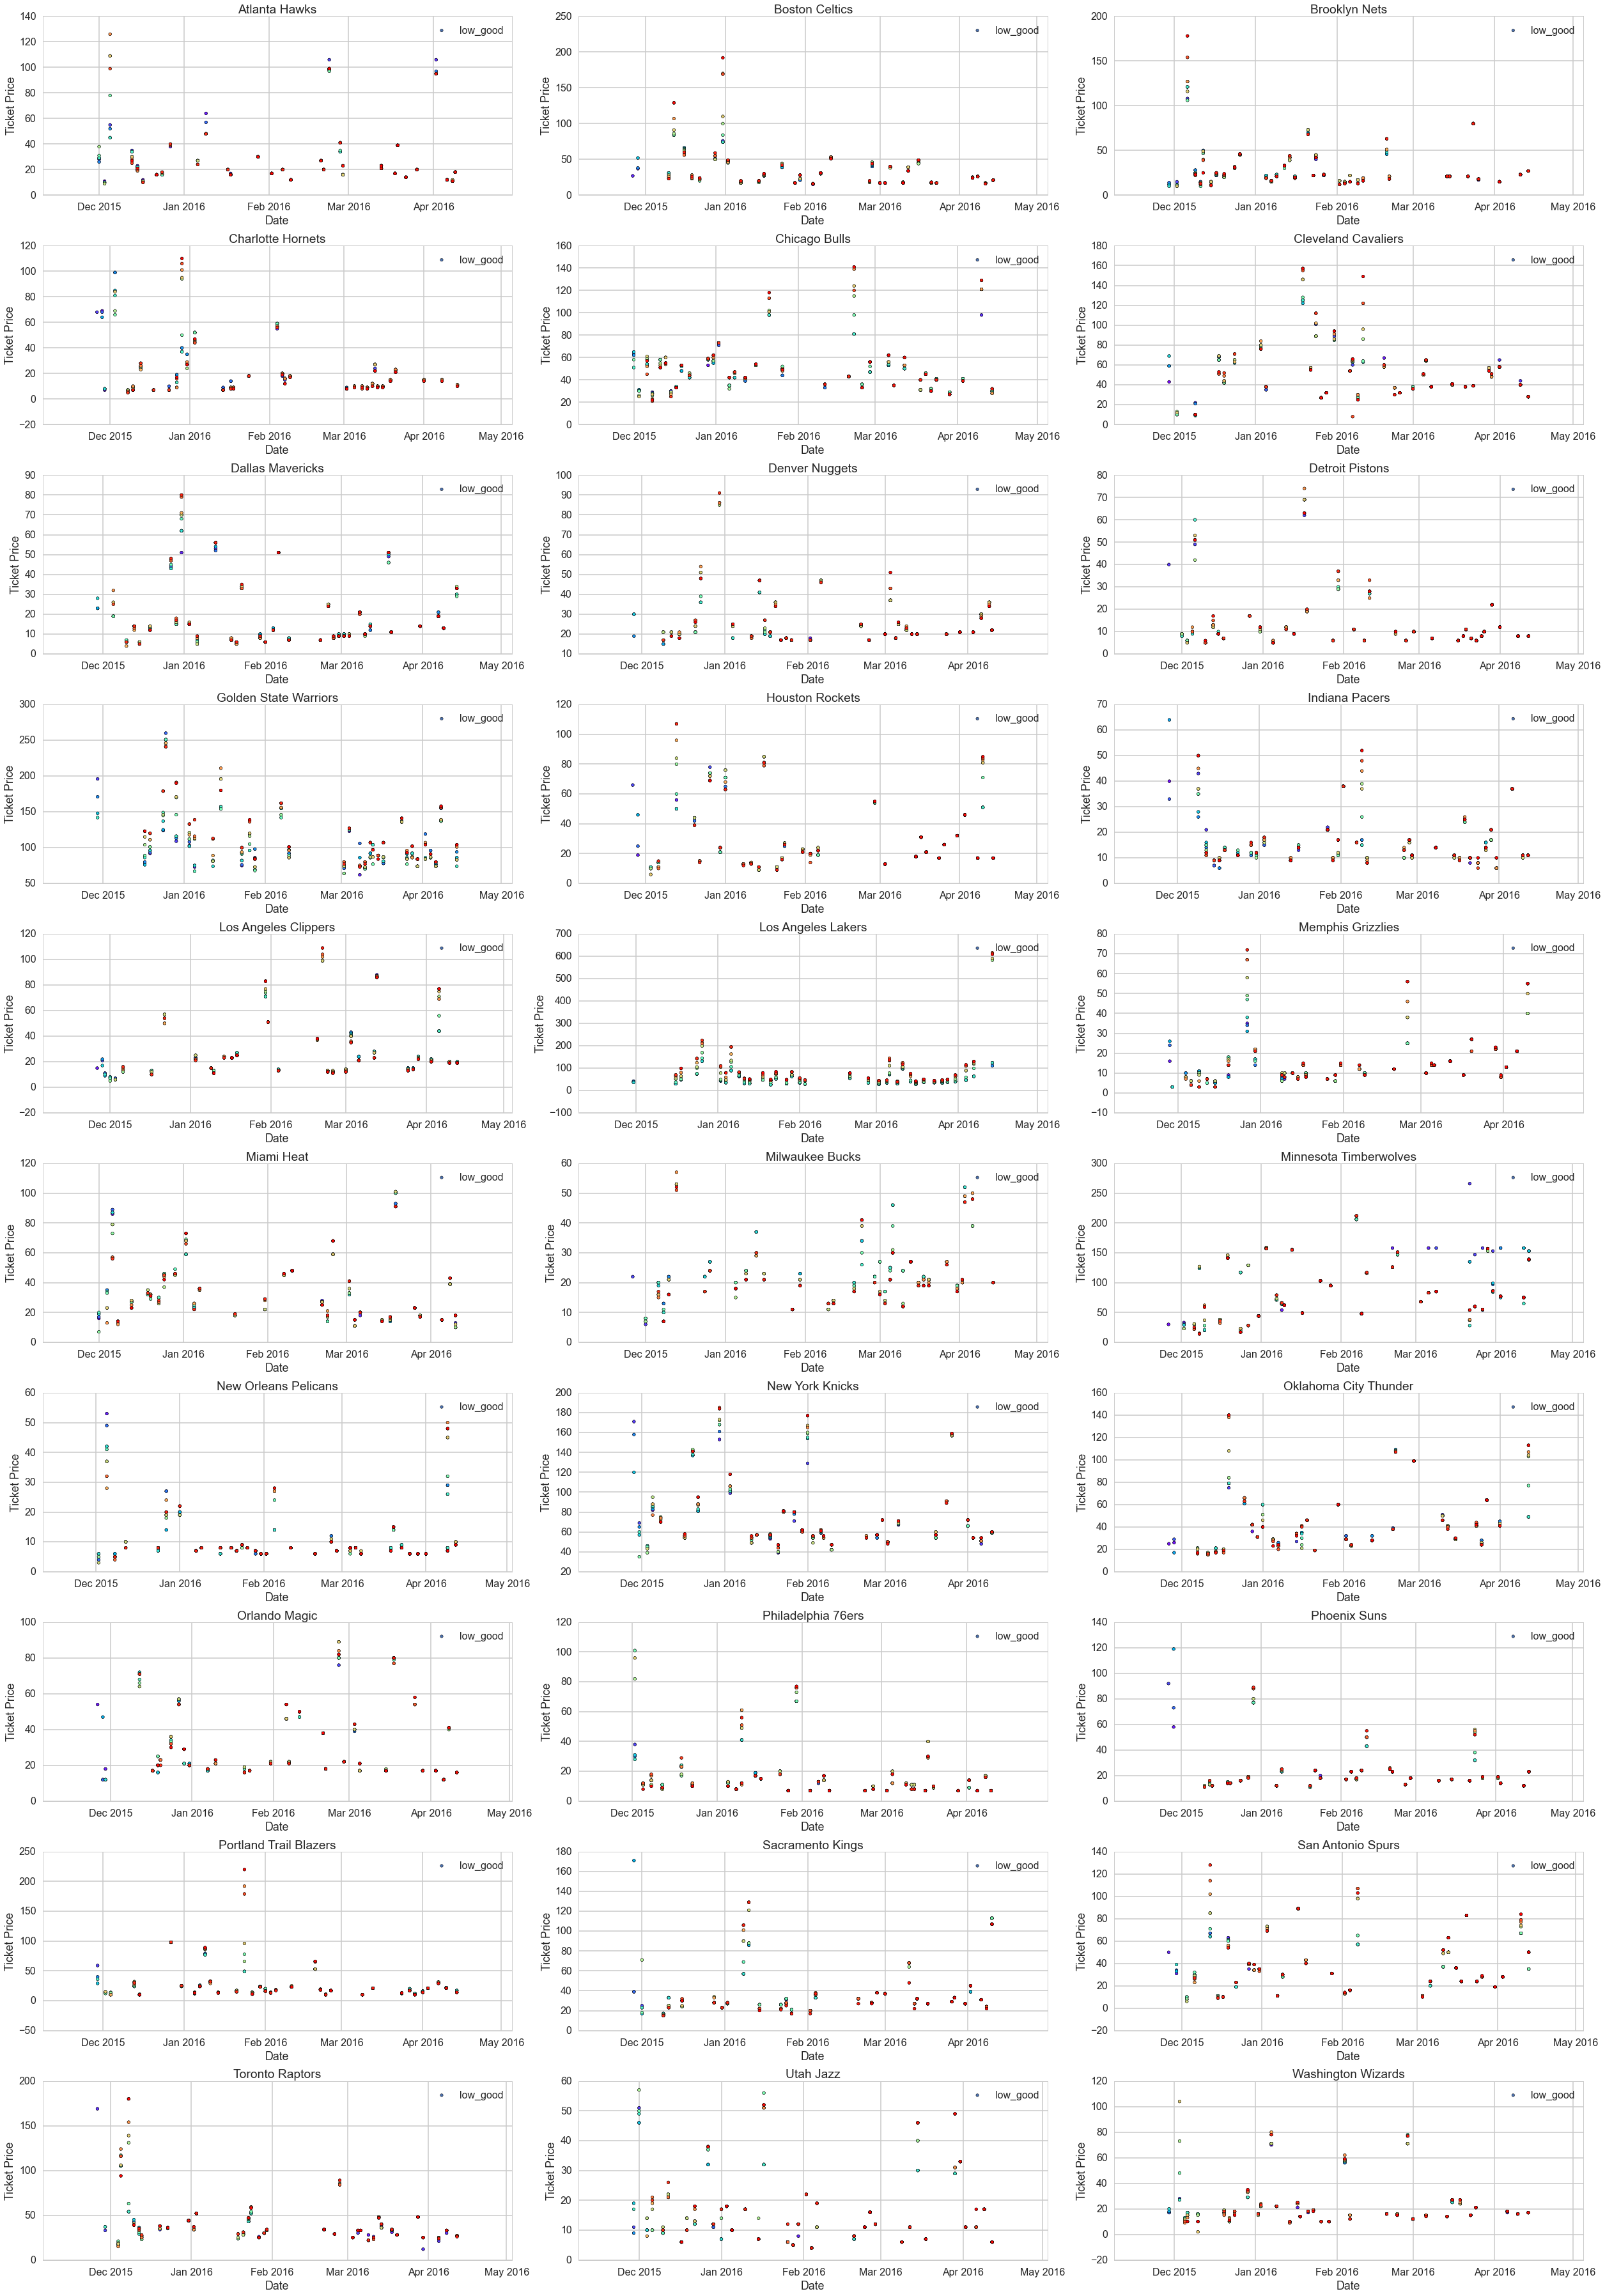

In [22]:
# tickets.groupby('home_team').plot('dateutc', 'avg_price')
# plt.title()
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), tickets.groupby('home_team')):
    #establish a figure
    plt.figure()
    #ax.scatter(team[1]['dateutc'].values, team[1]['avg_price'].values, alpha=1,  c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='avg')
    ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price_good_deal'].values, alpha=1, c=np.linspace(0,10,len(team[1])), cmap='rainbow',  label='low_good')
    #ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price'].values, alpha=0.5, c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='min')
    ax.set_title(team[0])
    ax.legend(loc='best')
    ax.set_xlabel('Date')
    ax.set_ylabel('Ticket Price')

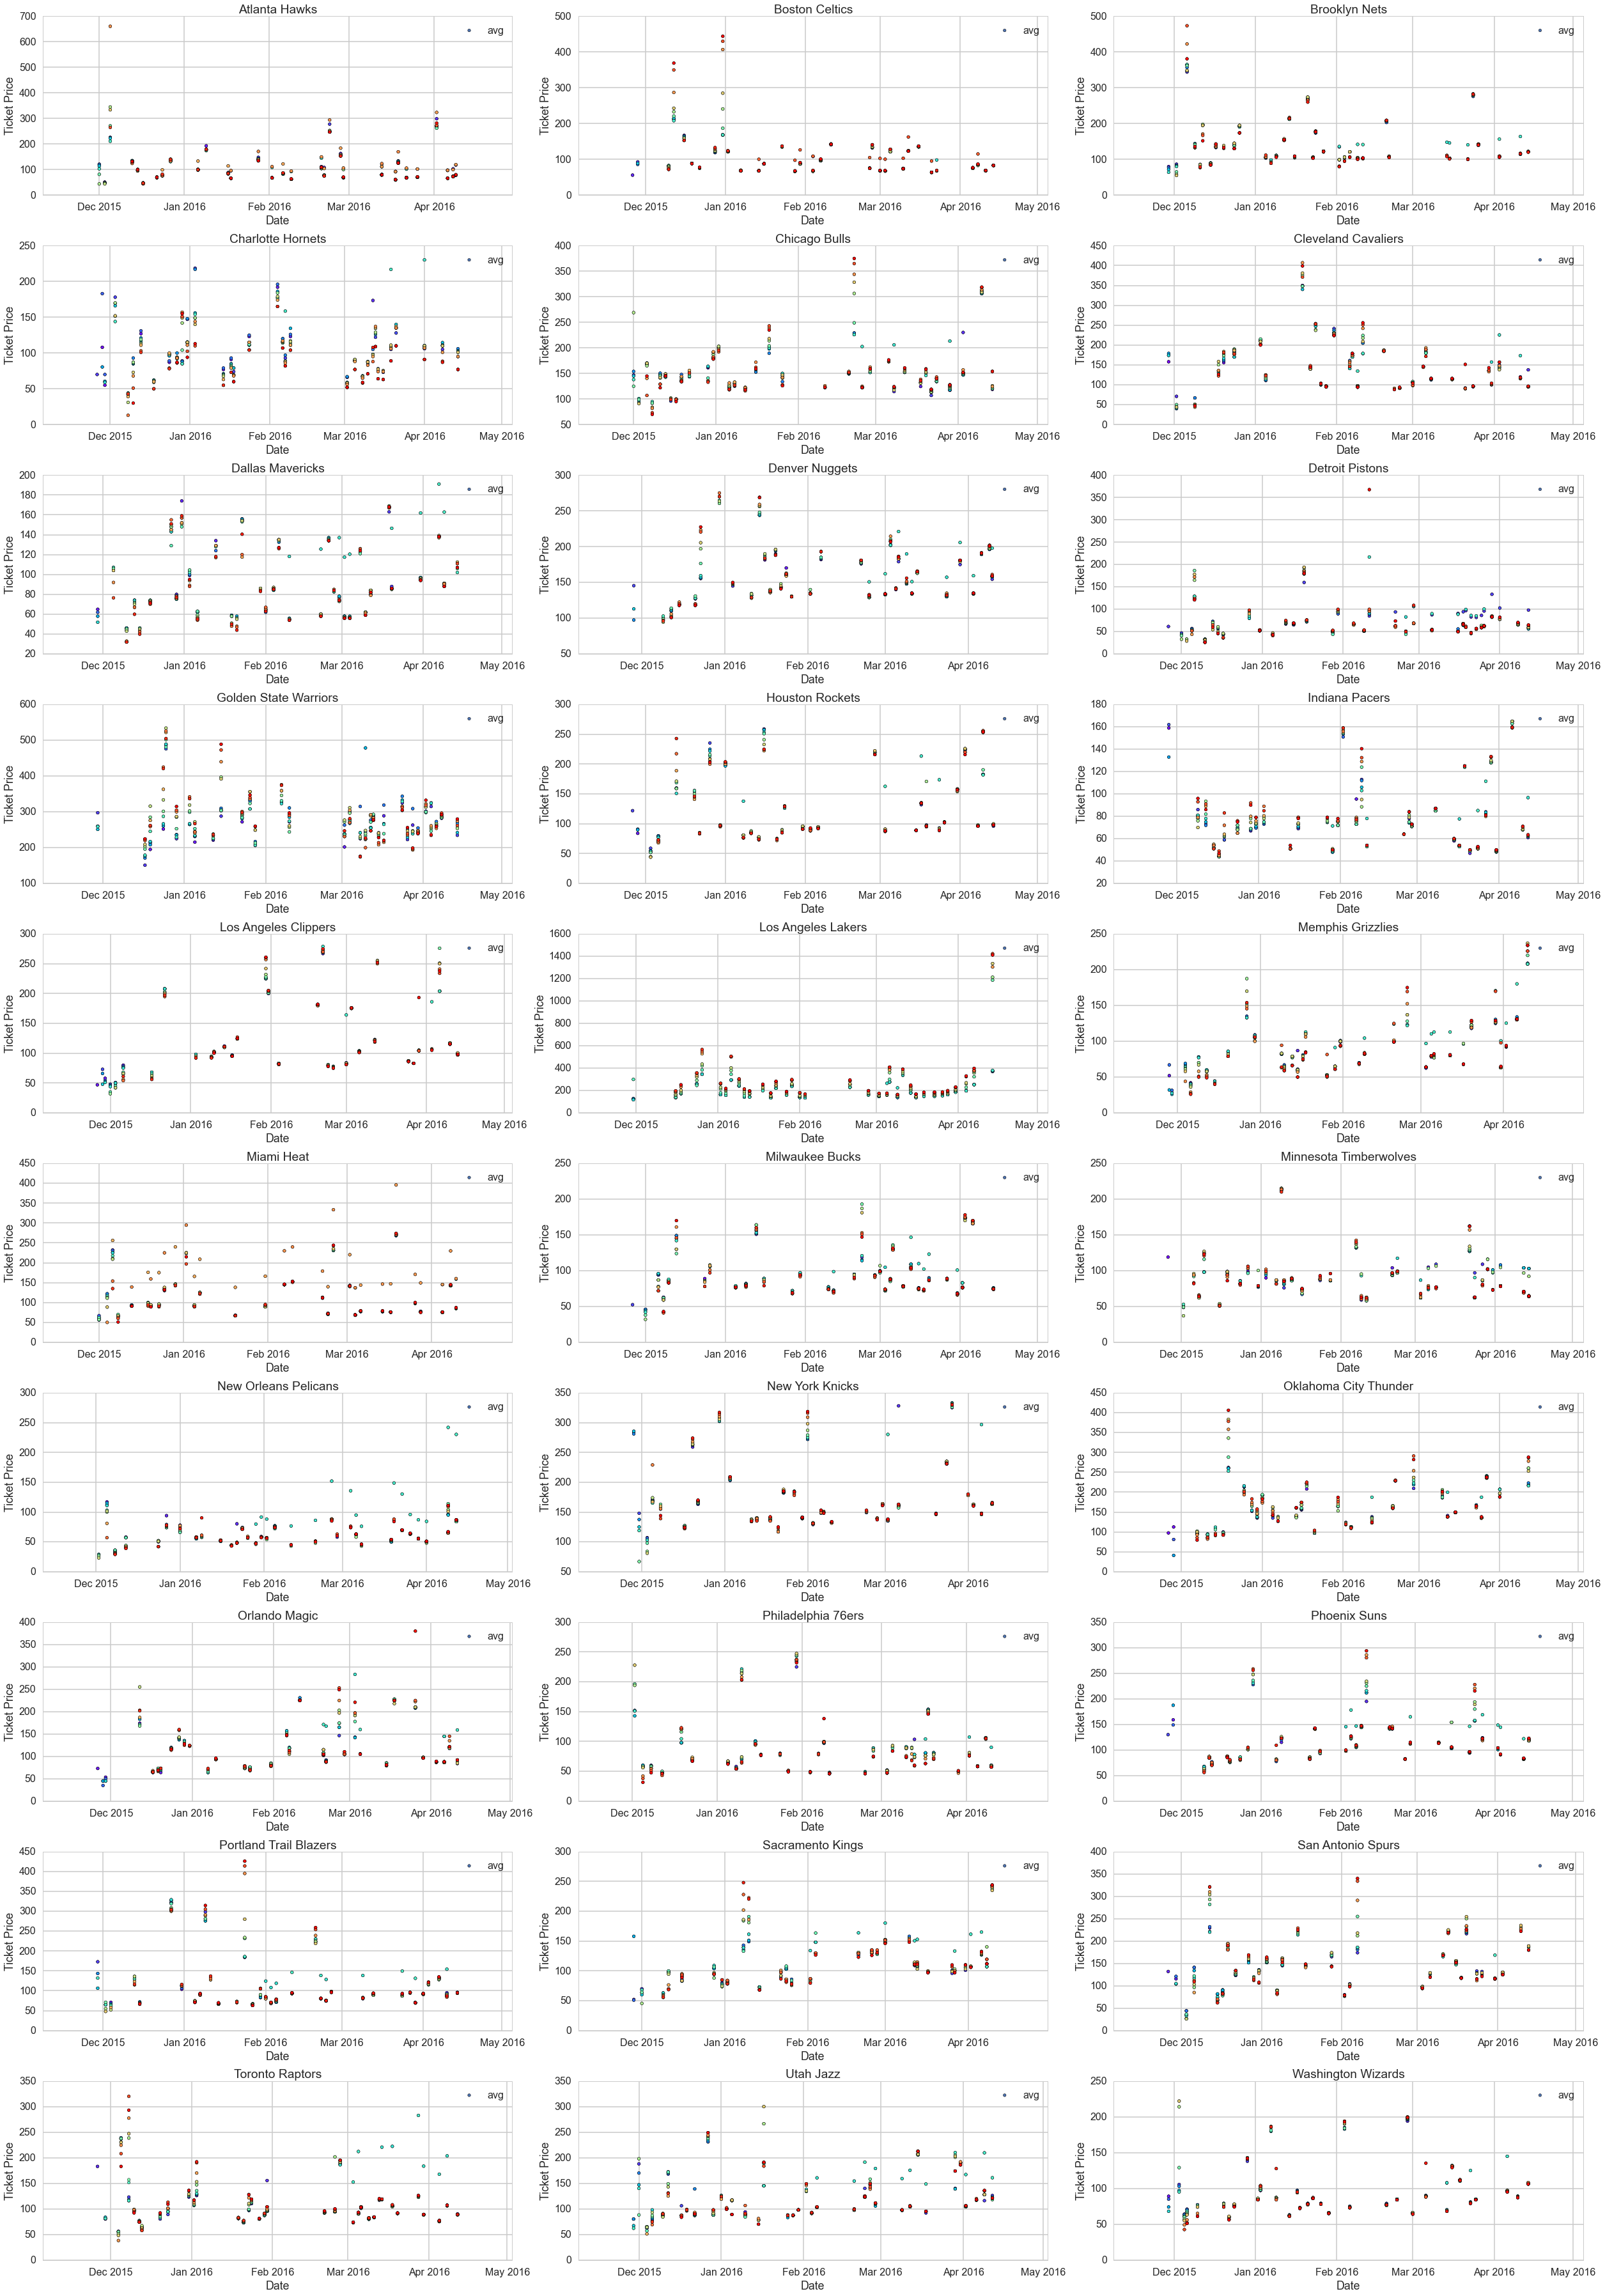

In [23]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), tickets.groupby('home_team')):
    #establish a figure
    plt.figure()
    ax.scatter(team[1]['dateutc'].values, team[1]['avg_price'].values, alpha=1,  c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='avg')
    #ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price_good_deal'].values, alpha=1, c=np.linspace(0,10,len(team[1])), cmap='rainbow',  label='low_good')
    #ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price'].values, alpha=0.5, c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='min')
    ax.set_title(team[0])
    ax.legend(loc='best')
    ax.set_xlabel('Date')
    ax.set_ylabel('Ticket Price')

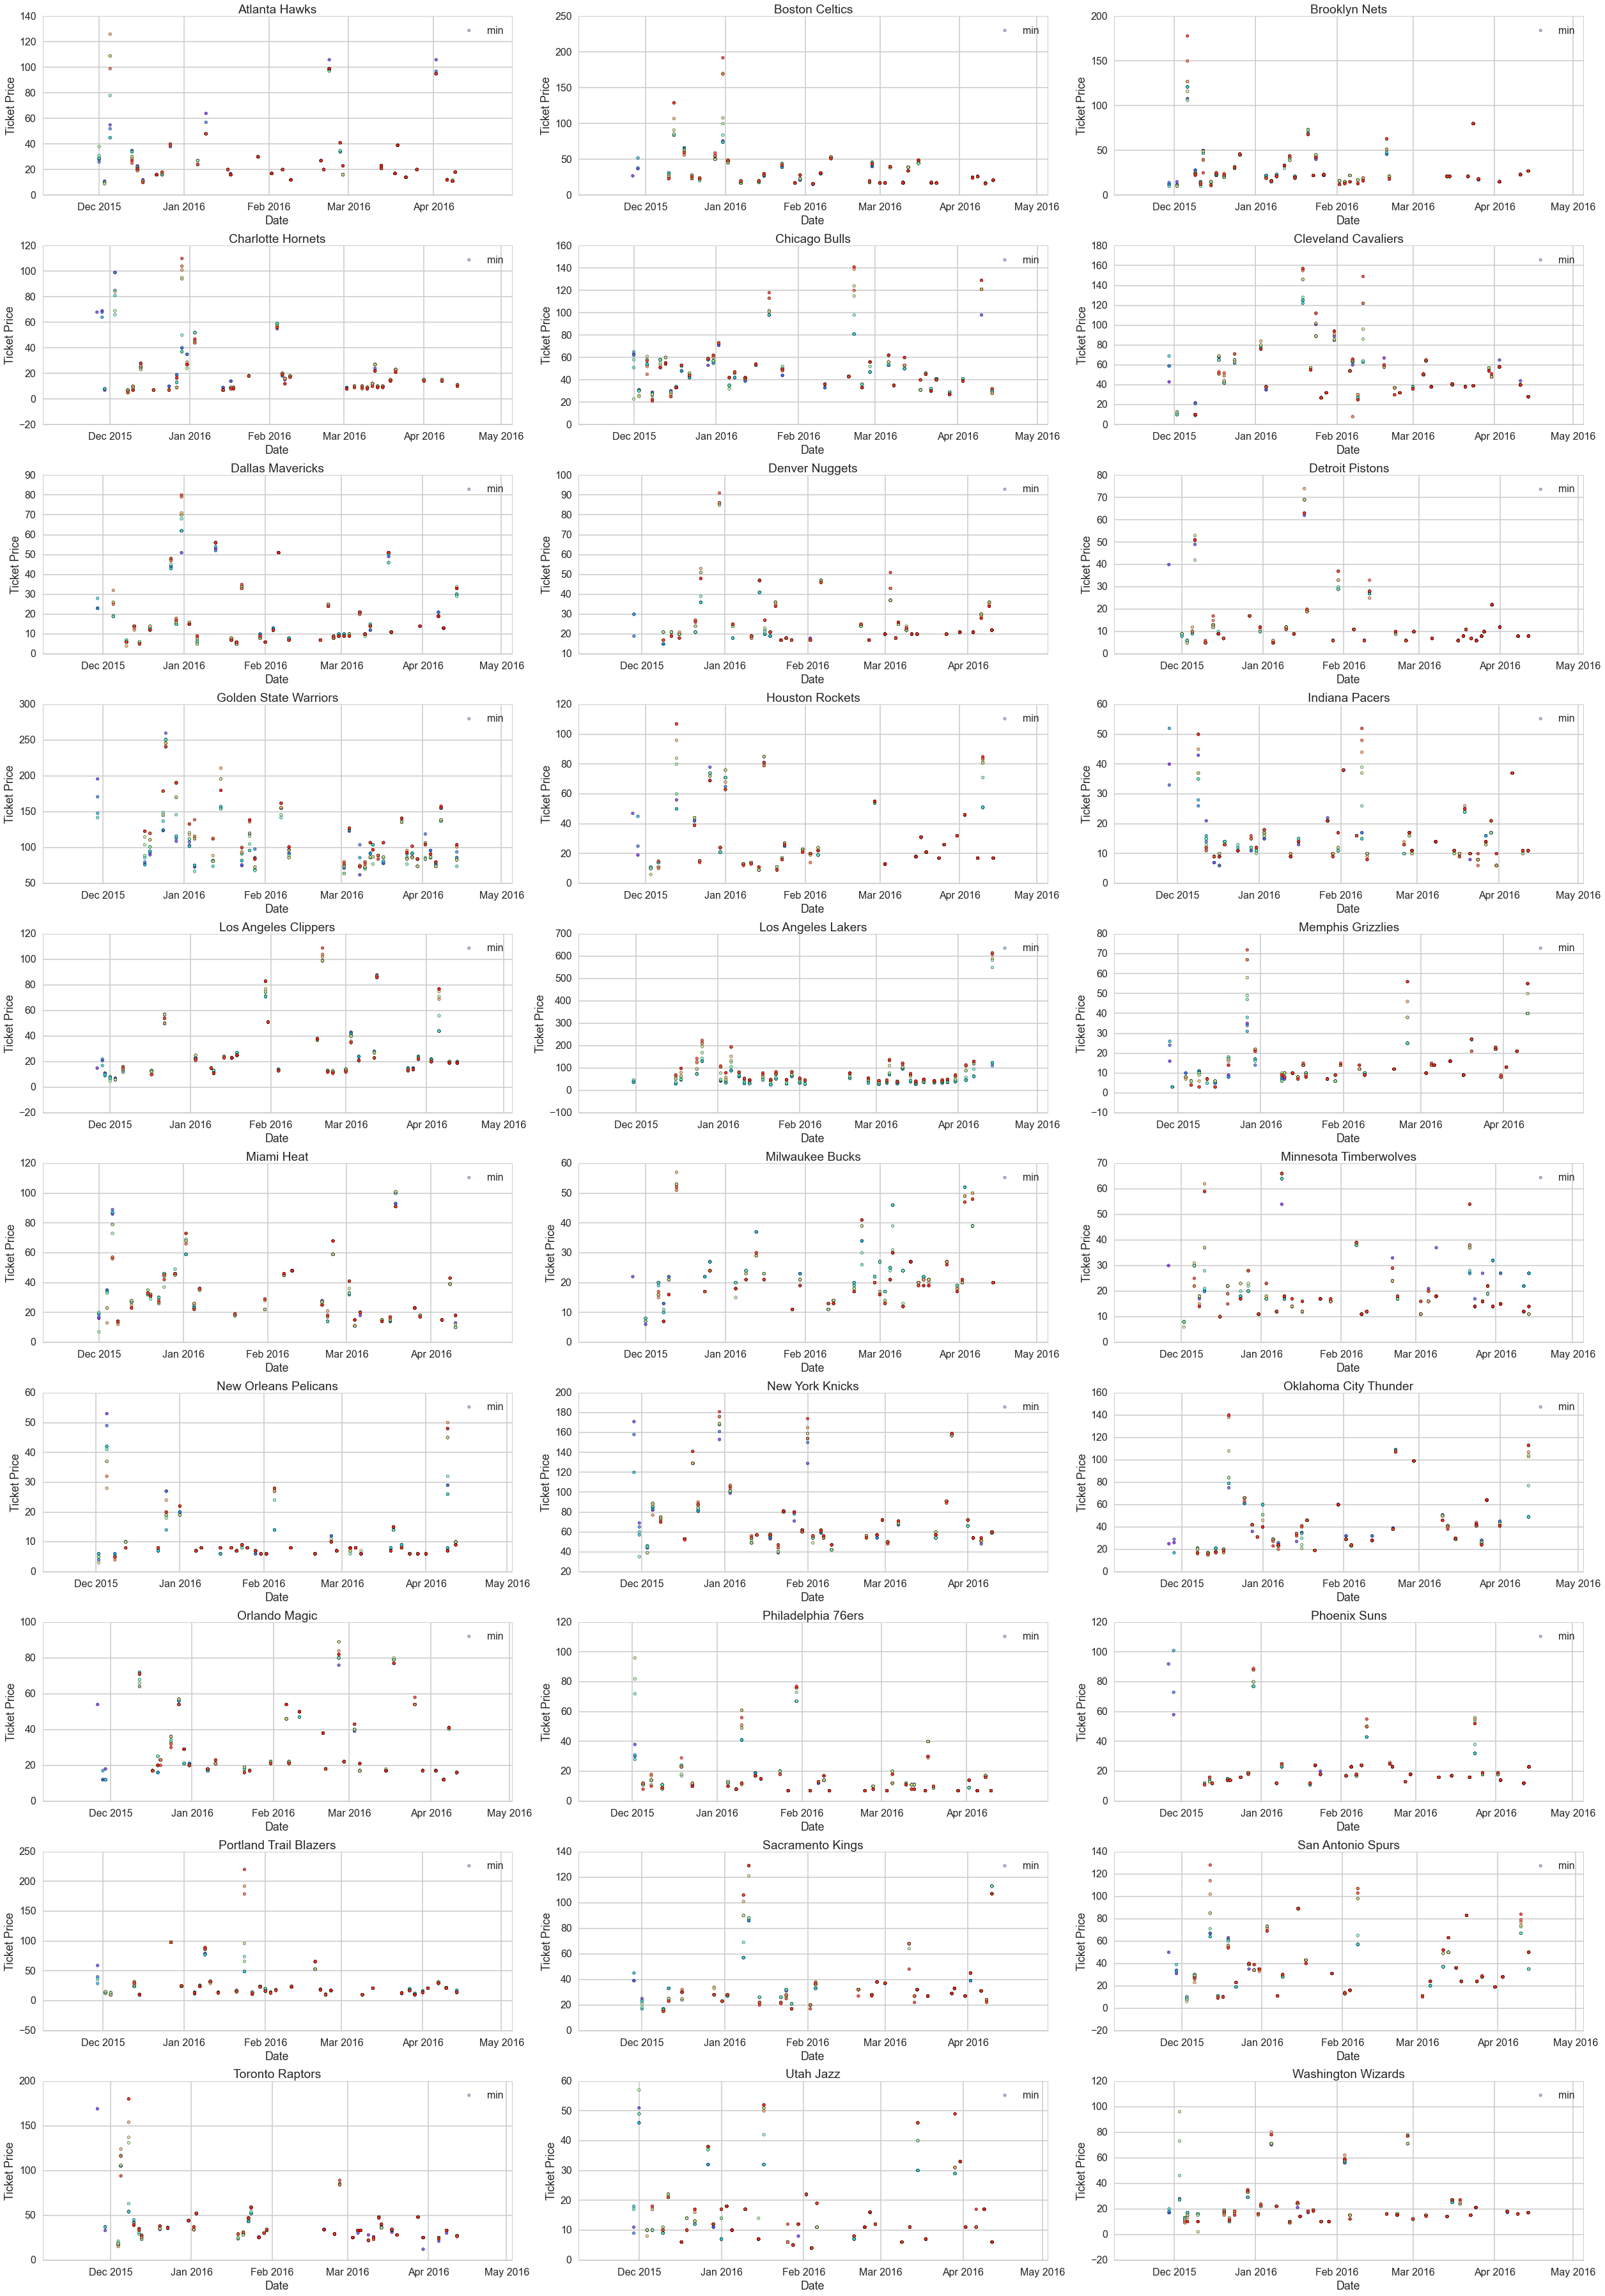

In [24]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), tickets.groupby('home_team')):
    #establish a figure
    plt.figure()
    #ax.scatter(team[1]['dateutc'].values, team[1]['avg_price'].values, alpha=1,  c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='avg')
    #ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price_good_deal'].values, alpha=1, c=np.linspace(0,10,len(team[1])), cmap='rainbow',  label='low_good')
    ax.scatter(team[1]['dateutc'].values, team[1]['lowest_price'].values, alpha=0.5, c=np.linspace(0,10,len(team[1])), cmap='rainbow', label='min')
    ax.set_title(team[0])
    ax.legend(loc='best')
    ax.set_xlabel('Date')
    ax.set_ylabel('Ticket Price')

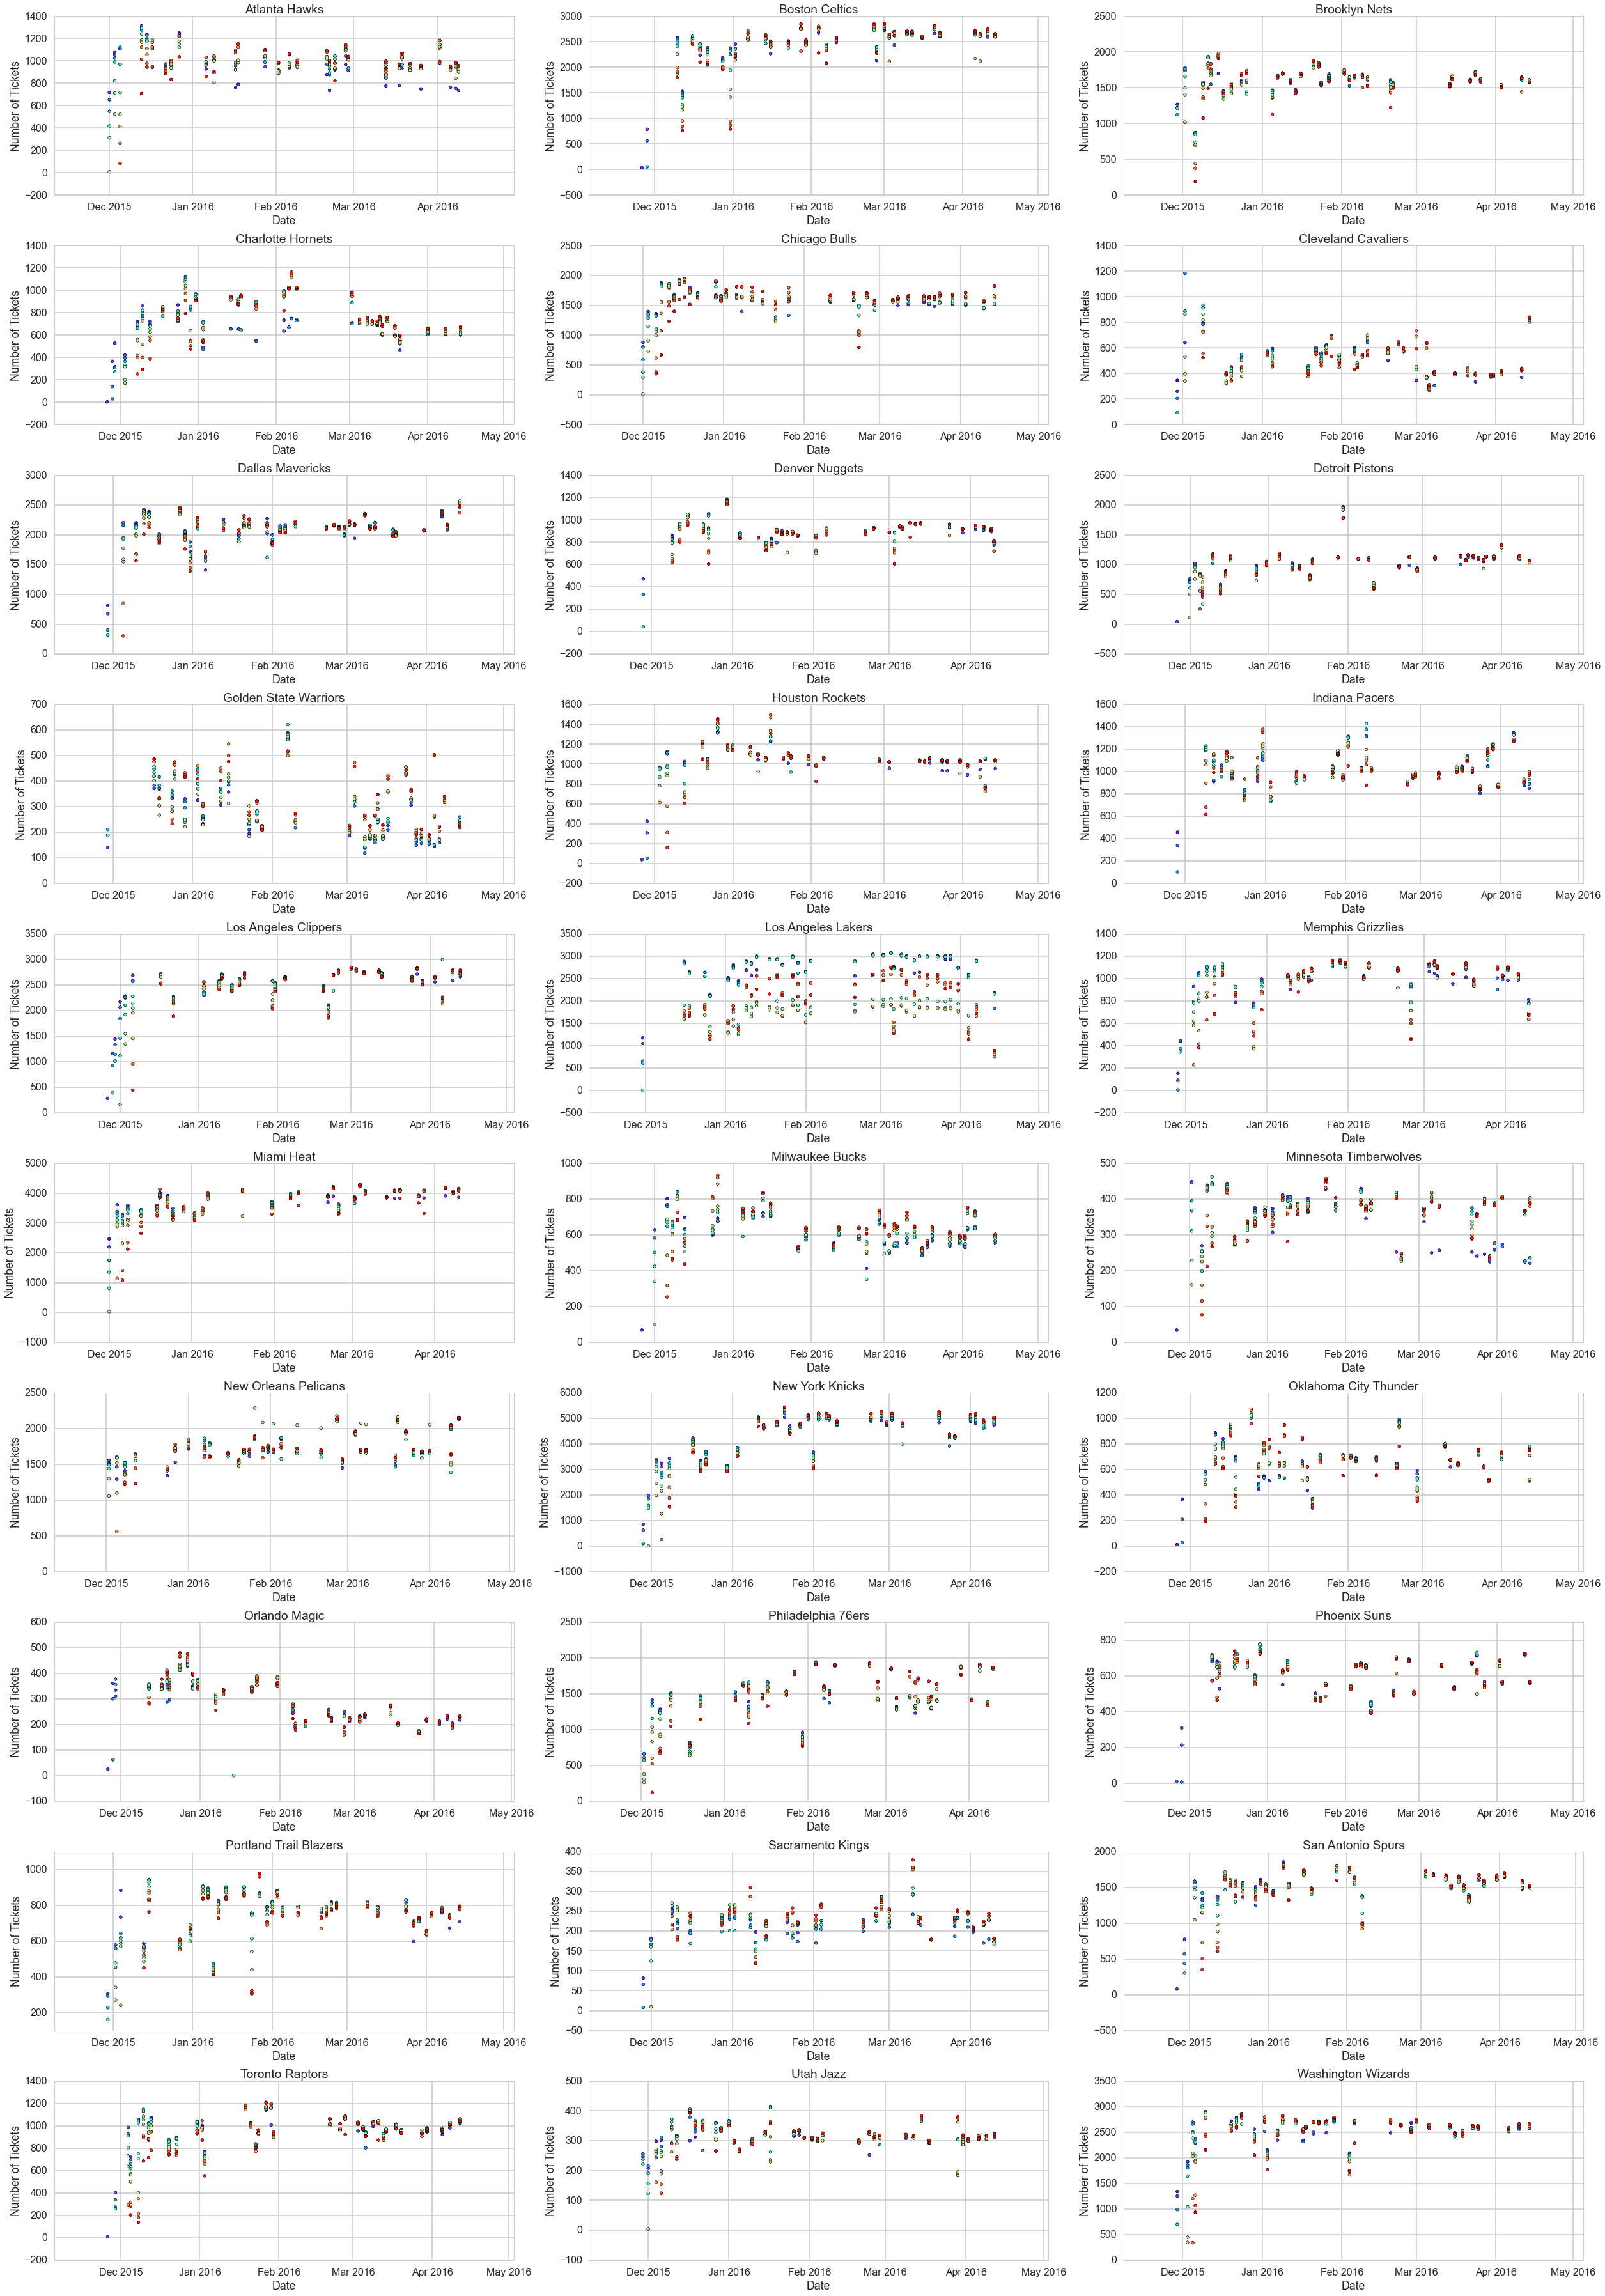

In [25]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), tickets.groupby('home_team')):
    #establish a figure
    plt.figure()
    ax.scatter(team[1]['dateutc'].values, team[1]['listing_count'].values, c=np.linspace(0,10,len(team[1])), cmap='rainbow')

    ax.set_title(team[0])
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Tickets')

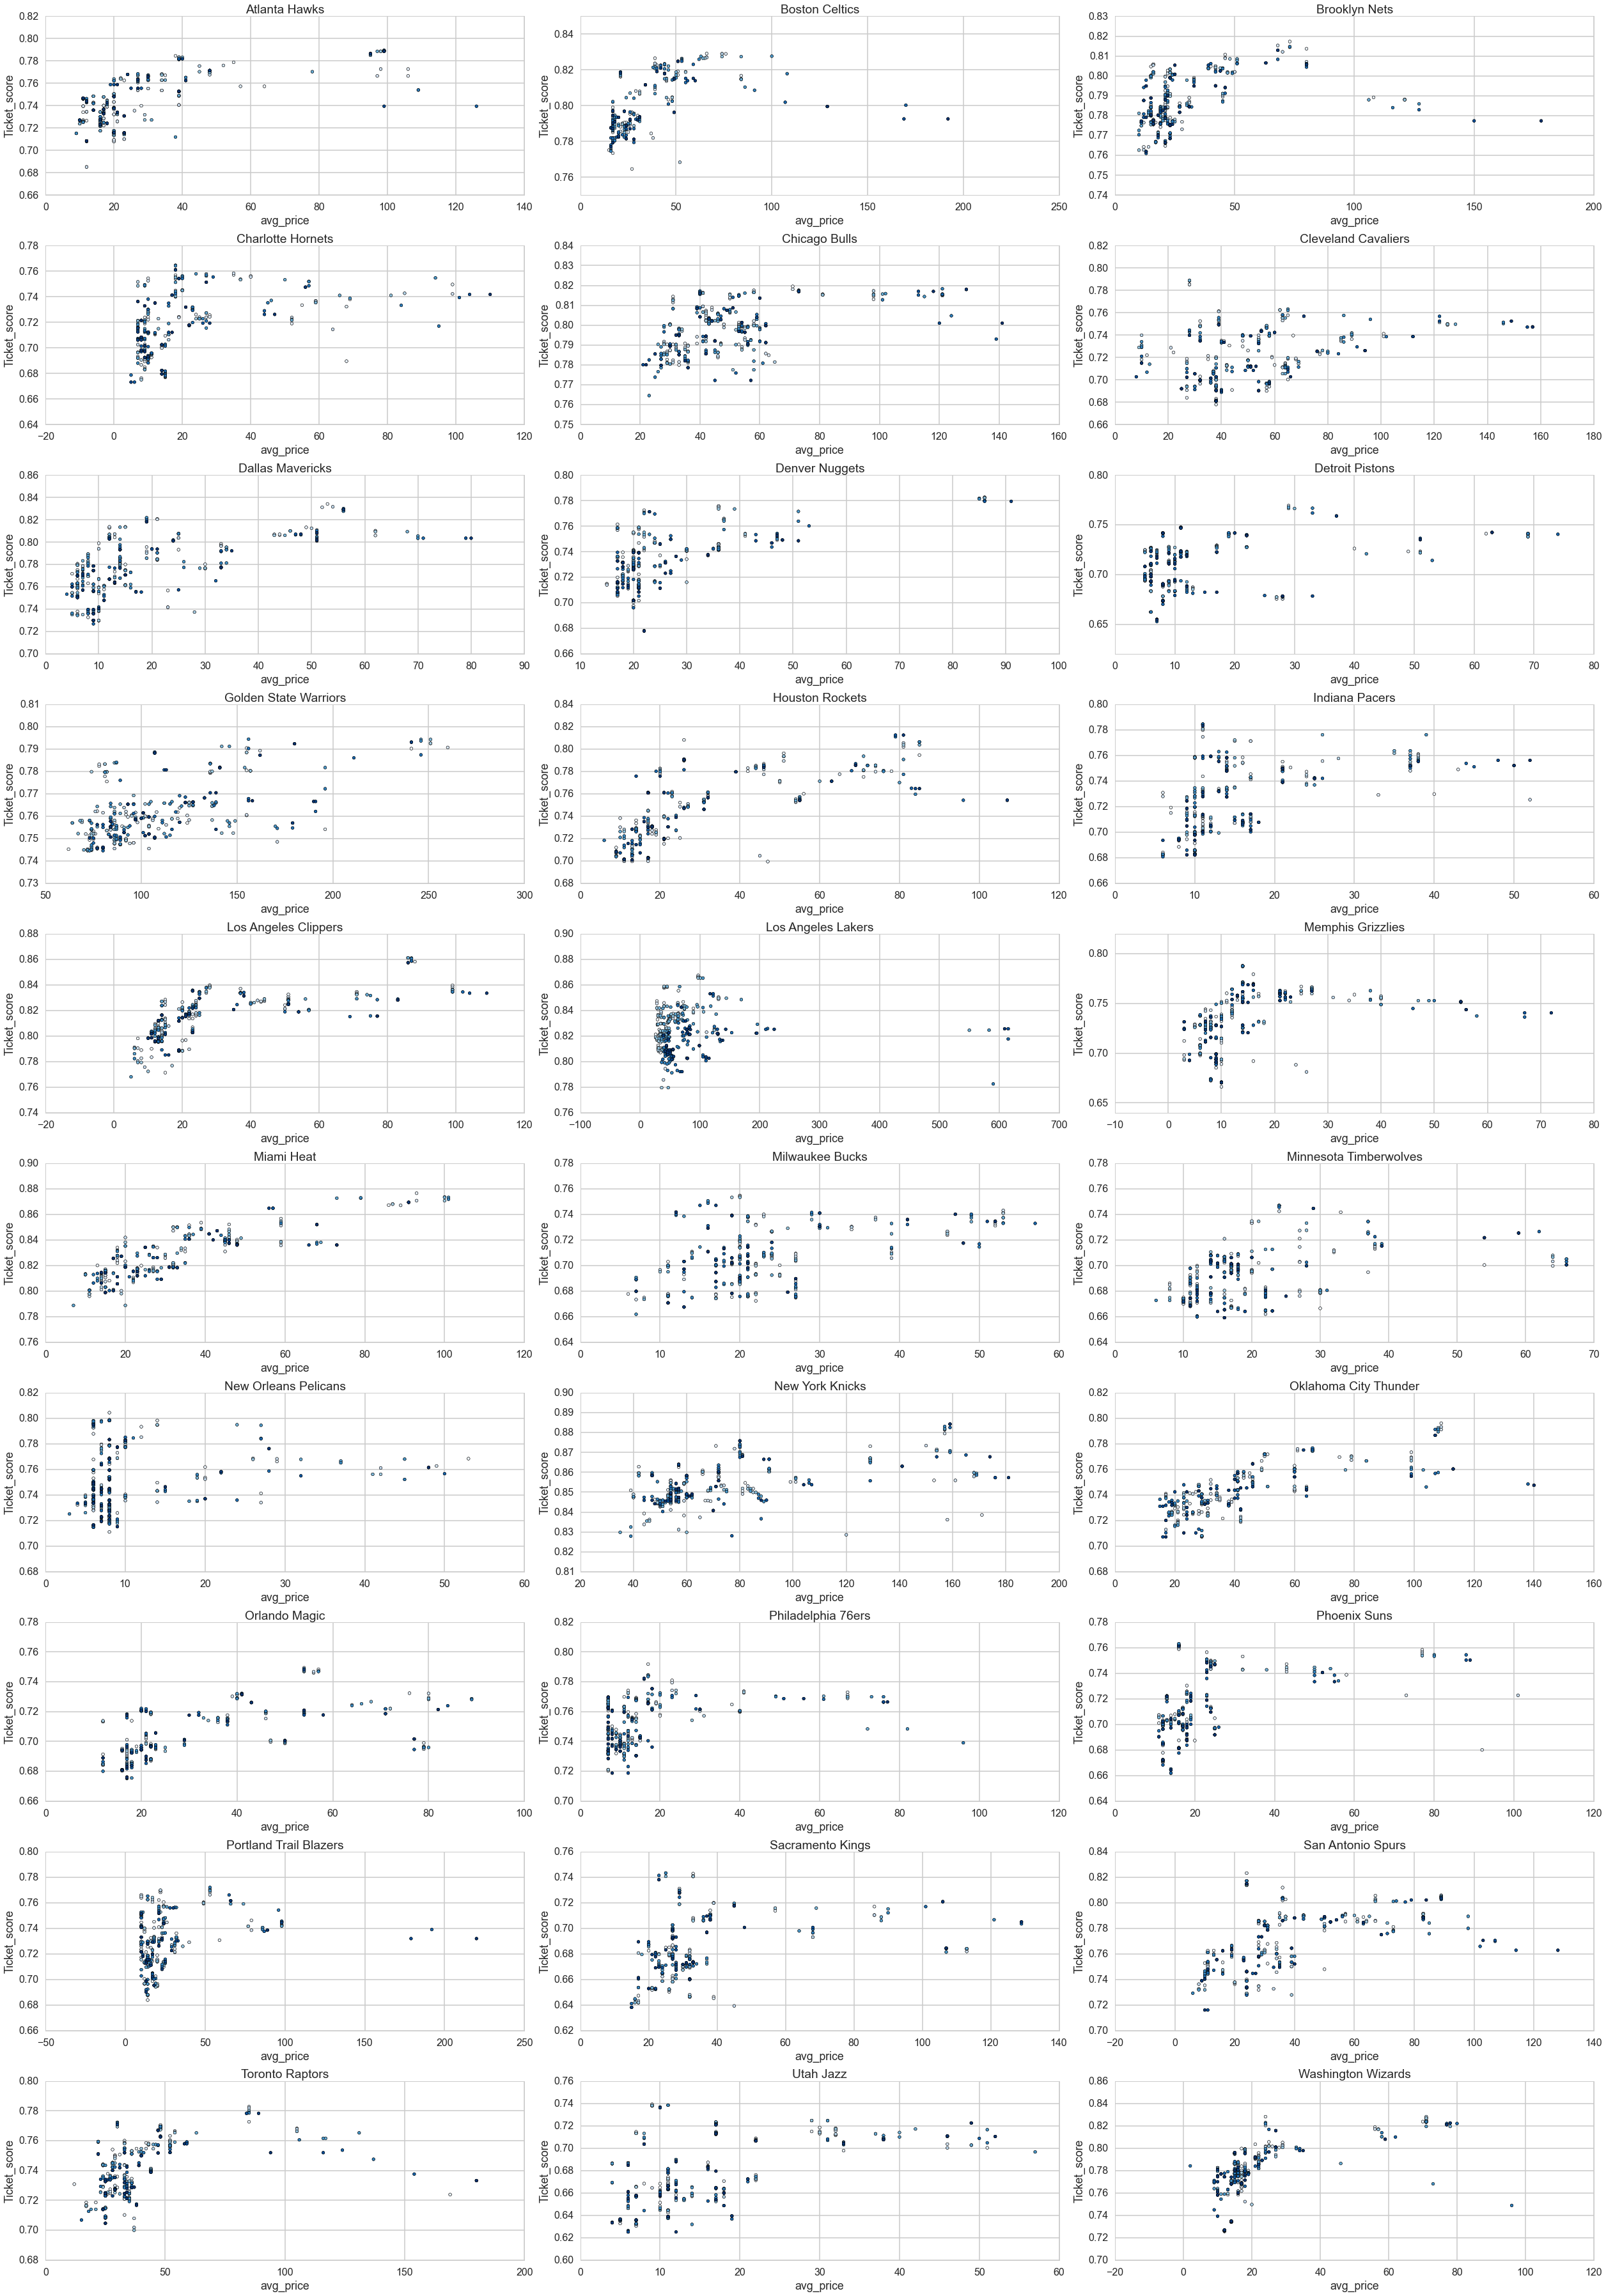

In [26]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), tickets.groupby('home_team')):
    #establish a figure
    plt.figure()
    ax.scatter(team[1]['lowest_price'].values, team[1]['ticket_score'].values, c=np.linspace(0,10,len(team[1])), cmap='Blues')
    ax.set_title(team[0])
    ax.set_xlabel('avg_price')
    ax.set_ylabel('Ticket_score')

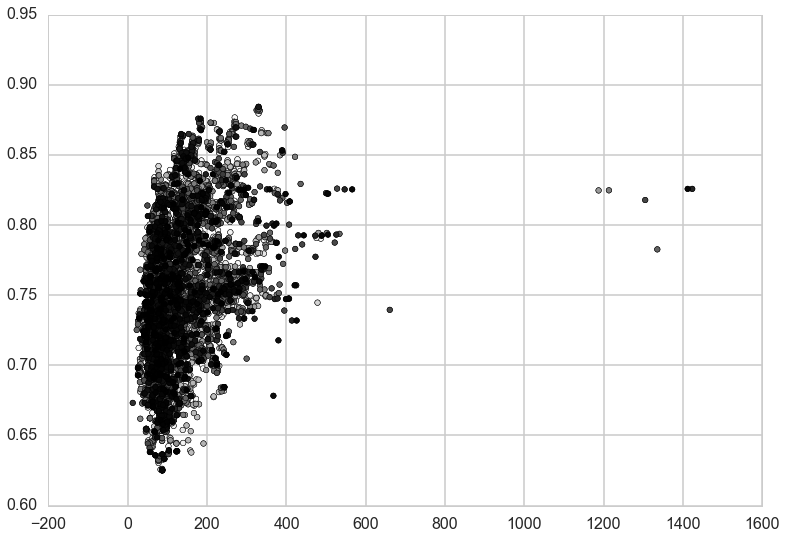

In [27]:
plt.scatter(tickets['avg_price'].values, tickets['ticket_score'].values, 30, c=np.linspace(0,10,len(tickets)) )

In [28]:
fulldf=pd.read_csv('cleanedFulldf.csv', index_col=0)
fulldf['dateutc'] = fulldf['dateutc'].astype('datetime64')
fulldf = fulldf.drop('dateutcindateform', 1)

In [29]:
fulldf.head(20)

listing_count  avg_price  lowest_price_good  lowest_price  highest_price   city                venuename  venuescore  ticket_score       id   home_team              away_team  hometeamscore  awayteamscore    dateutc  daysaway  dateloaded   City  cntStars_home  WPCT_home  STRK_home  rankNBA_home  cntStars_away  WPCT_away  STRK_away  rankNBA_away  HomeAVG  HomePCT  AwayAVG  AwayPCT  TotalAVG  TotalPCT  Population  numTeams  holiday    weekday
1             815       62.0                 20            20           1800  Miami  American Airlines Arena     0.85776       0.78884  2759732  Miami Heat         Boston Celtics        0.78556        0.74908 2015-12-01         2  2015-11-29  Miami              2      0.667          1             5              0      0.563          2            12    19659    100.3    16840     84.2     18720      94.9     5764000         4        0    Tuesday
4            3431      146.0                 49            49           6505  Miami  American Airlines Arena     0.85776       0.84152  2759651  Miami Heat          Brooklyn Nets        0.78556        0.75524 2015-12-29        30  2015-11-29  Miami              2      0.667          1             5              3      0.188         -2            28    19659    100.3    16840     84.2     18720      94.9     5764000         4        0    Tuesday
5            4093       76.0                 18            18           4435  Miami  American Airlines Arena     0.85776       0.82779  2759635  Miami Heat          Brooklyn Nets        0.78556        0.75524 2016-03-28       120  2015-11-29  Miami              2      0.667          1             5              3      0.188         -2            28    19659    100.3    16840     84.2     18720      94.9     5764000         4        0     Monday
7            3886      125.0                 36            36           5914  Miami  American Airlines Arena     0.85776       0.84336  2759767  Miami Heat        New York Knicks        0.78556        0.81215 2016-01-07        39  2015-11-29  Miami              2      0.667          1             5              1      0.471         -3            19    19659    100.3    16840     84.2     18720      94.9     5764000         4        0   Thursday
9            4046       78.0                 20            20           4140  Miami  American Airlines Arena     0.85776       0.83536  2759683  Miami Heat     Philadelphia 76ers        0.78556        0.70023 2016-03-06        98  2015-11-29  Miami              2      0.667          1             5              0      0.000        -17            30    19659    100.3    16840     84.2     18720      94.9     5764000         4        0     Sunday
11           3483      100.0                 32            32           4731  Miami  American Airlines Arena     0.85776       0.82222  2759671  Miami Heat        Toronto Raptors        0.78556        0.68539 2015-12-19        20  2015-11-29  Miami              2      0.667          1             5              1      0.647          4             7    19659    100.3    16840     84.2     18720      94.9     5764000         4        0   Saturday
14           3838      141.0                 33            33           5914  Miami  American Airlines Arena     0.85776       0.84987  2759649  Miami Heat          Chicago Bulls        0.78556        0.76158 2016-03-02        94  2015-11-29  Miami              2      0.667          1             5              2      0.643         -1             8    19659    100.3    16840     84.2     18720      94.9     5764000         4        0  Wednesday
15           4050      142.0                 39            39           7688  Miami  American Airlines Arena     0.85776       0.84890  2759652  Miami Heat          Chicago Bulls        0.78556        0.76158 2016-04-08       131  2015-11-29  Miami              2      0.667          1             5              2      0.643         -1             8    19659    100.3    16840     84.2     18720      94.9     5